In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import glob
from IPython.display import display, HTML
from pandas import Series, DataFrame

In [4]:
cu = pd.DataFrame({'Category': ['Average Speed', 'Calories Burned', 'Distance', 'Max Altitude', 'Time'], 
                   'Unit': ['mph', 'kcal', 'mi', 'ft', 'sec']}).set_index('Category')
cu_script = cu.to_html()
cu #combike unit
#print(cu_script)

,Unit
Category,
Average Speed,mph
Calories Burned,kcal
Distance,mi
Max Altitude,ft
Time,sec


In [5]:
clist = [] #combike list of dataframes
for cgather in glob.glob('data/*_combike.csv'): #combike gather records
    print(f'Loading {cgather}')
    cmerged = pd.read_csv(cgather, parse_dates=["Date"]).sort_index() #combike merged records
    clist.append(cmerged)

print('Number of Files Loaded: ',len(clist))

ct = pd.concat(clist).set_index('Date') #combike total
cst = ct.reindex(sorted(ct.columns), axis=1) #combike sorted total
cst.tail()

Loading data\20231220_combike.csv
Loading data\20240103_combike.csv
Loading data\20240117_combike.csv
Loading data\20240118_combike.csv
Loading data\20240119_combike.csv
Loading data\20240124_combike.csv
Loading data\20240131_combike.csv
Loading data\20240207_combike.csv
Loading data\20240214_combike.csv
Loading data\20240221_combike.csv
Loading data\20240228_combike.csv
Loading data\20240306_combike.csv
Loading data\20240313_combike.csv
Loading data\20240320_combike.csv
Loading data\20240403_combike.csv
Loading data\20240417_combike.csv
Loading data\20240424_combike.csv
Loading data\20240508_combike.csv
Loading data\20240515_combike.csv
Loading data\20240520_combike.csv
Loading data\20240623_combike.csv
Number of Files Loaded:  21


,Average Speed,Calories Burned,Distance,Max Altitude,Purpose,Time
Date,,,,,,
2024-05-08,9.0,1887,2.5,436,Home from Work,1133
2024-05-15,9.4,108,3.6,288,Bike to Work,1662
2024-05-15,10.4,117,2.5,436,Home from Work,1067
2024-05-20,9.0,701,13.8,400,Training,7729
2024-06-23,8.4,59,4.2,1299,Testing,1047


In [6]:
dg = cst.groupby("Purpose") #draft group
cg = dg.size().reset_index().rename(columns={0: 'Count'}) #combike group
tc = cg['Count'].sum() #total count

cc = pd.DataFrame({'Inventory' : ['Total Records', 'Files Loaded'], 'Count' : [tc, len(clist)]}).set_index('Inventory')
cc #combike count
cc_script = cc.to_html()
#cc_script
cg
cc

,Count
Inventory,
Total Records,38
Files Loaded,21


In [7]:
cave = pd.pivot_table(data=cst,index=['Purpose', "Distance"]).round(2) 
cave.columns = pd.MultiIndex.from_product([['Ave'], ["Average Speed", "Calories Burned", "Max Altitude", "Time"]])
cave_script = cave.to_html()
#cave_script
cave #combike average per purpose

Ave                                      
                          Average Speed Calories Burned Max Altitude     Time
Purpose          Distance                                                    
Bike to Aunt's   2.2               8.50           54.00       206.00  1081.00
Bike to Work     2.5               7.91           81.71       347.57  1401.00
                 2.6               7.32          146.40       320.20  1889.00
                 2.7               8.07          102.25       316.25  1741.50
                 3.6               9.40          108.00       288.00  1662.00
Home from Aunt's 1.9               9.90           25.00       170.00   751.00
Home from Work   2.0               8.70           92.00       475.00  1283.00
                 2.2               9.50           91.00       354.00  1190.00
                 2.4               8.20           92.00       347.00  1437.00
                 2.5               8.65          372.15       528.46  1432.15
                 2.6               8.10          106.00       295.00  1403.00
Testing          4.2               8.40           59.00      1299.00  1047.00
Training         13.8              9.00          701.00       400.00  7729.00

In [8]:
csum = cst[["Calories Burned", "Distance", "Time"]].sum().reset_index().rename(columns={0: 'Sum', 'index': 'Category'}).round(2).set_index('Category')
csum_script = csum.to_html()
#csum_script
csum #combike sum all purpose

,Sum
Category,
Calories Burned,7879.0
Distance,108.7
Time,62419.0


In [9]:
p1 = dg.get_group("Bike to Work").set_index('Purpose')
cminp1 = p1[["Average Speed", "Calories Burned", "Distance", "Max Altitude", "Time"]].min().reset_index().rename(columns={0: 'Bike to Work', 'index': 'Category'}).round(2).set_index('Category') #combike min bike to work purpose
p2 = dg.get_group("Home from Work").set_index('Purpose')
cminp2 = p2[["Average Speed", "Calories Burned", "Distance", "Max Altitude", "Time"]].min().reset_index().rename(columns={0: 'Home from Work', 'index': 'Category'}).round(2).set_index('Category') #combike min home from work purpose
p3 = dg.get_group("Bike to Aunt's").set_index('Purpose')
cminp3 = p3[["Average Speed", "Calories Burned", "Distance", "Max Altitude", "Time"]].min().reset_index().rename(columns={0: "Bike from Aunt's", 'index': 'Category'}).round(2).set_index('Category') #combike min bike to aunt's purpose
p4 = dg.get_group("Home from Aunt's").set_index('Purpose')
cminp4 = p4[["Average Speed", "Calories Burned", "Distance", "Max Altitude", "Time"]].min().reset_index().rename(columns={0: "Home from Aunt's", 'index': 'Category'}).round(2).set_index('Category') #combike min home from aunt's purpose
p5 = dg.get_group("Testing").set_index('Purpose')
cminp5 = p5[["Average Speed", "Calories Burned", "Distance", "Max Altitude", "Time"]].min().reset_index().rename(columns={0: 'Testing', 'index': 'Category'}).round(2).set_index('Category') #combike min testing purpose
p6 = dg.get_group("Training").set_index('Purpose')
cminp6 = p6[["Average Speed", "Calories Burned", "Distance", "Max Altitude", "Time"]].min().reset_index().rename(columns={0: 'Training', 'index': 'Category'}).round(2).set_index('Category') #combike min training purpose
cminlist = [cminp1, cminp2, cminp3, cminp4, cminp5, cminp6]
cmint = pd.concat(cminlist, axis=1)
cmint.columns = pd.MultiIndex.from_product([['Min'], ["Bike to Work", "Home from Work", "Bike from Aunt's", "Home from Aunt's", "Testing", "Training"]])
cmint #combike min total

p1 = dg.get_group("Bike to Work").set_index('Purpose')
cmaxp1 = p1[["Average Speed", "Calories Burned", "Distance", "Max Altitude", "Time"]].max().reset_index().rename(columns={0: 'Bike to Work', 'index': 'Category'}).round(2).set_index('Category') #combike max bike to work purpose
p2 = dg.get_group("Home from Work").set_index('Purpose')
cmaxp2 = p2[["Average Speed", "Calories Burned", "Distance", "Max Altitude", "Time"]].max().reset_index().rename(columns={0: 'Home from Work', 'index': 'Category'}).round(2).set_index('Category') #combike max home from work purpose
p3 = dg.get_group("Bike to Aunt's").set_index('Purpose')
cmaxp3 = p3[["Average Speed", "Calories Burned", "Distance", "Max Altitude", "Time"]].max().reset_index().rename(columns={0: "Bike from Aunt's", 'index': 'Category'}).round(2).set_index('Category') #combike max bike to aunt's purpose
p4 = dg.get_group("Home from Aunt's").set_index('Purpose')
cmaxp4 = p4[["Average Speed", "Calories Burned", "Distance", "Max Altitude", "Time"]].max().reset_index().rename(columns={0: "Home from Aunt's", 'index': 'Category'}).round(2).set_index('Category') #combike max home from aunt's purpose
p5 = dg.get_group("Testing").set_index('Purpose')
cmaxp5 = p5[["Average Speed", "Calories Burned", "Distance", "Max Altitude", "Time"]].max().reset_index().rename(columns={0: 'Testing', 'index': 'Category'}).round(2).set_index('Category') #combike max testing purpose
p6 = dg.get_group("Training").set_index('Purpose')
cmaxp6 = p6[["Average Speed", "Calories Burned", "Distance", "Max Altitude", "Time"]].max().reset_index().rename(columns={0: 'Training', 'index': 'Category'}).round(2).set_index('Category') #combike max training purpose
cmaxlist = [cmaxp1, cmaxp2, cmaxp3, cmaxp4, cmaxp5, cmaxp6]
cmaxt = pd.concat(cmaxlist, axis=1)
cmaxt.columns = pd.MultiIndex.from_product([['Max'], ["Bike to Work", "Home from Work", "Bike from Aunt's", "Home from Aunt's", "Testing", "Training"]])
cmaxt #combike max total

cminmax = pd.concat ([cmint, cmaxt], axis=1)
cminmax_script = cminmax.to_html()
#cminmax_script
cminmax

Min                                                   \
                Bike to Work Home from Work Bike from Aunt's Home from Aunt's   
Category                                                                        
Average Speed            6.6            7.7              8.5              9.9   
Calories Burned         50.0           72.0             54.0             25.0   
Distance                 2.5            2.0              2.2              1.9   
Max Altitude           278.0          295.0            206.0            170.0   
Time                  1278.0         1067.0           1081.0            751.0   

                                          Max                                  \
                Testing Training Bike to Work Home from Work Bike from Aunt's   
Category                                                                        
Average Speed       8.4      9.0          9.4           10.4              8.5   
Calories Burned    59.0    701.0        226.0         1887.0             54.0   
Distance            4.2     13.8          3.6            2.6              2.2   
Max Altitude     1299.0    400.0        475.0         1299.0            206.0   
Time             1047.0   7729.0       2429.0         1861.0           1081.0   

                                                   
                Home from Aunt's Testing Training  
Category                                           
Average Speed                9.9     8.4      9.0  
Calories Burned             25.0    59.0    701.0  
Distance                     1.9     4.2     13.8  
Max Altitude               170.0  1299.0    400.0  
Time                       751.0  1047.0   7729.0

In [10]:
as_b2w = cst.loc[cst["Purpose"] == "Bike to Work"].loc[:,"Average Speed"]
as_b2wd = as_b2w.to_frame(name="Bike to Work")
as_hfw = cst.loc[cst["Purpose"] == "Home from Work"].loc[:,"Average Speed"]
as_hfwd = as_hfw.to_frame(name="Home from Work")
as_b2a = cst.loc[cst["Purpose"] == "Bike to Aunt's"].loc[:,"Average Speed"]
as_b2ad = as_b2a.to_frame(name="Bike to Aunt's")
as_hfa = cst.loc[cst["Purpose"] == "Home from Aunt's"].loc[:,"Average Speed"]
as_hfad = as_hfa.to_frame(name="Home from Aunt's")
as_tra = cst.loc[cst["Purpose"] == "Training"].loc[:,"Average Speed"]
as_trad = as_tra.to_frame(name="Training")
as_tes = cst.loc[cst["Purpose"] == "Testing"].loc[:,"Average Speed"]
as_ted = as_tes.to_frame(name="Testing")
aslist = [as_b2wd, as_hfwd, as_b2ad, as_hfad, as_trad, as_ted]
ast = pd.concat(aslist, axis=1).fillna(0)
ast.columns = pd.MultiIndex.from_product([["Average Speed"], ["Bike to Work", "Home from Work", "Bike to Aunt's", "Home from Aunt's", "Training", "Testing"]])
ast.head() #average speed total

Average Speed                                                 \
            Bike to Work Home from Work Bike to Aunt's Home from Aunt's   
Date                                                                      
2023-12-20           8.8            9.7            0.0              0.0   
2024-01-03           8.2            8.2            0.0              0.0   
2024-01-17           6.6            8.3            0.0              0.0   
2024-01-18           0.0            0.0            8.5              0.0   
2024-01-19           0.0            0.0            0.0              9.9   

                             
           Training Testing  
Date                         
2023-12-20      0.0     0.0  
2024-01-03      0.0     0.0  
2024-01-17      0.0     0.0  
2024-01-18      0.0     0.0  
2024-01-19      0.0     0.0

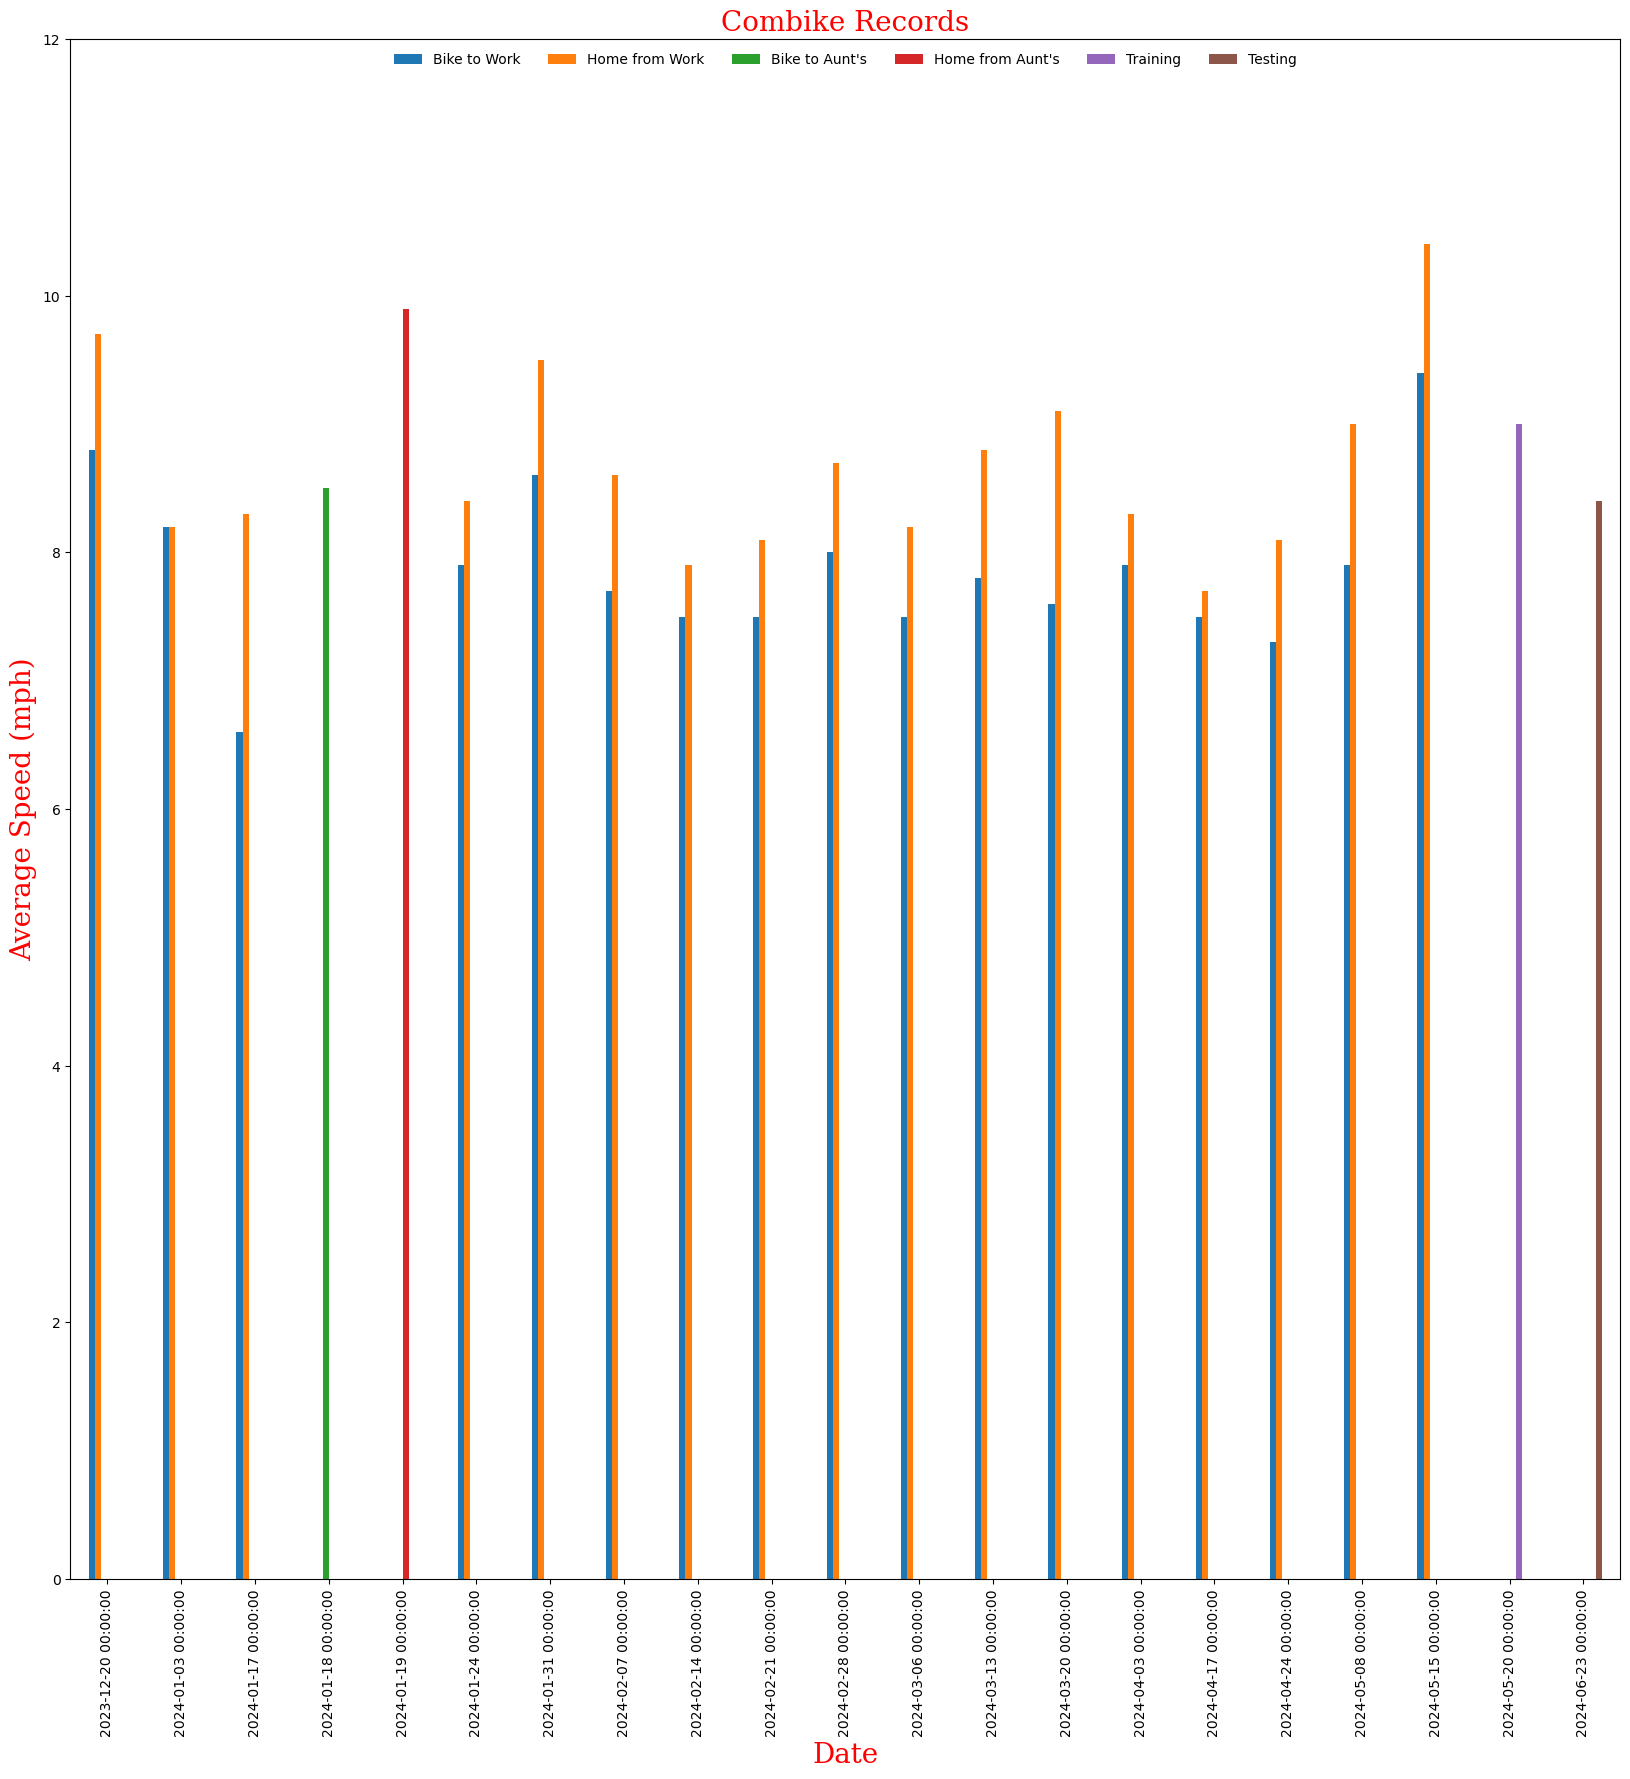

In [11]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
ast.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Bike to Aunt's", "Home from Aunt's", "Training", "Testing"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Combike Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Average Speed (mph)', fontdict=f1)
plt.ylim(0, 12)
plt.savefig("fig/ast_combike.png")
plt.show()

In [12]:
cb_b2w = cst.loc[cst["Purpose"] == "Bike to Work"].loc[:,"Calories Burned"]
cb_b2wd = cb_b2w.to_frame(name="Bike to Work")
cb_hfw = cst.loc[cst["Purpose"] == "Home from Work"].loc[:,"Calories Burned"]
cb_hfwd = cb_hfw.to_frame(name="Home from Work")
cb_b2a = cst.loc[cst["Purpose"] == "Bike to Aunt's"].loc[:,"Calories Burned"]
cb_b2ad = cb_b2a.to_frame(name="Bike to Aunt's")
cb_hfa = cst.loc[cst["Purpose"] == "Home from Aunt's"].loc[:,"Calories Burned"]
cb_hfad = cb_hfa.to_frame(name="Home from Aunt's")
cb_tra = cst.loc[cst["Purpose"] == "Training"].loc[:,"Calories Burned"]
cb_trad = cb_tra.to_frame(name="Training")
cb_tes = cst.loc[cst["Purpose"] == "Testing"].loc[:,"Calories Burned"]
cb_ted = cb_tes.to_frame(name="Testing")
cblist = [cb_b2wd, cb_hfwd, cb_b2ad, cb_hfad, cb_trad, cb_ted]
cbt = pd.concat(cblist, axis=1).fillna(0)
cbt.columns = pd.MultiIndex.from_product([["Calories Burned"], ["Bike to Work", "Home from Work", "Bike to Aunt's", "Home from Aunt's", "Training", "Testing"]])
cbt.head() #calories burned total

Calories Burned                                                 \
              Bike to Work Home from Work Bike to Aunt's Home from Aunt's   
Date                                                                        
2023-12-20            97.0         1787.0            0.0              0.0   
2024-01-03            83.0           92.0            0.0              0.0   
2024-01-17           127.0          100.0            0.0              0.0   
2024-01-18             0.0            0.0           54.0              0.0   
2024-01-19             0.0            0.0            0.0             25.0   

                             
           Training Testing  
Date                         
2023-12-20      0.0     0.0  
2024-01-03      0.0     0.0  
2024-01-17      0.0     0.0  
2024-01-18      0.0     0.0  
2024-01-19      0.0     0.0

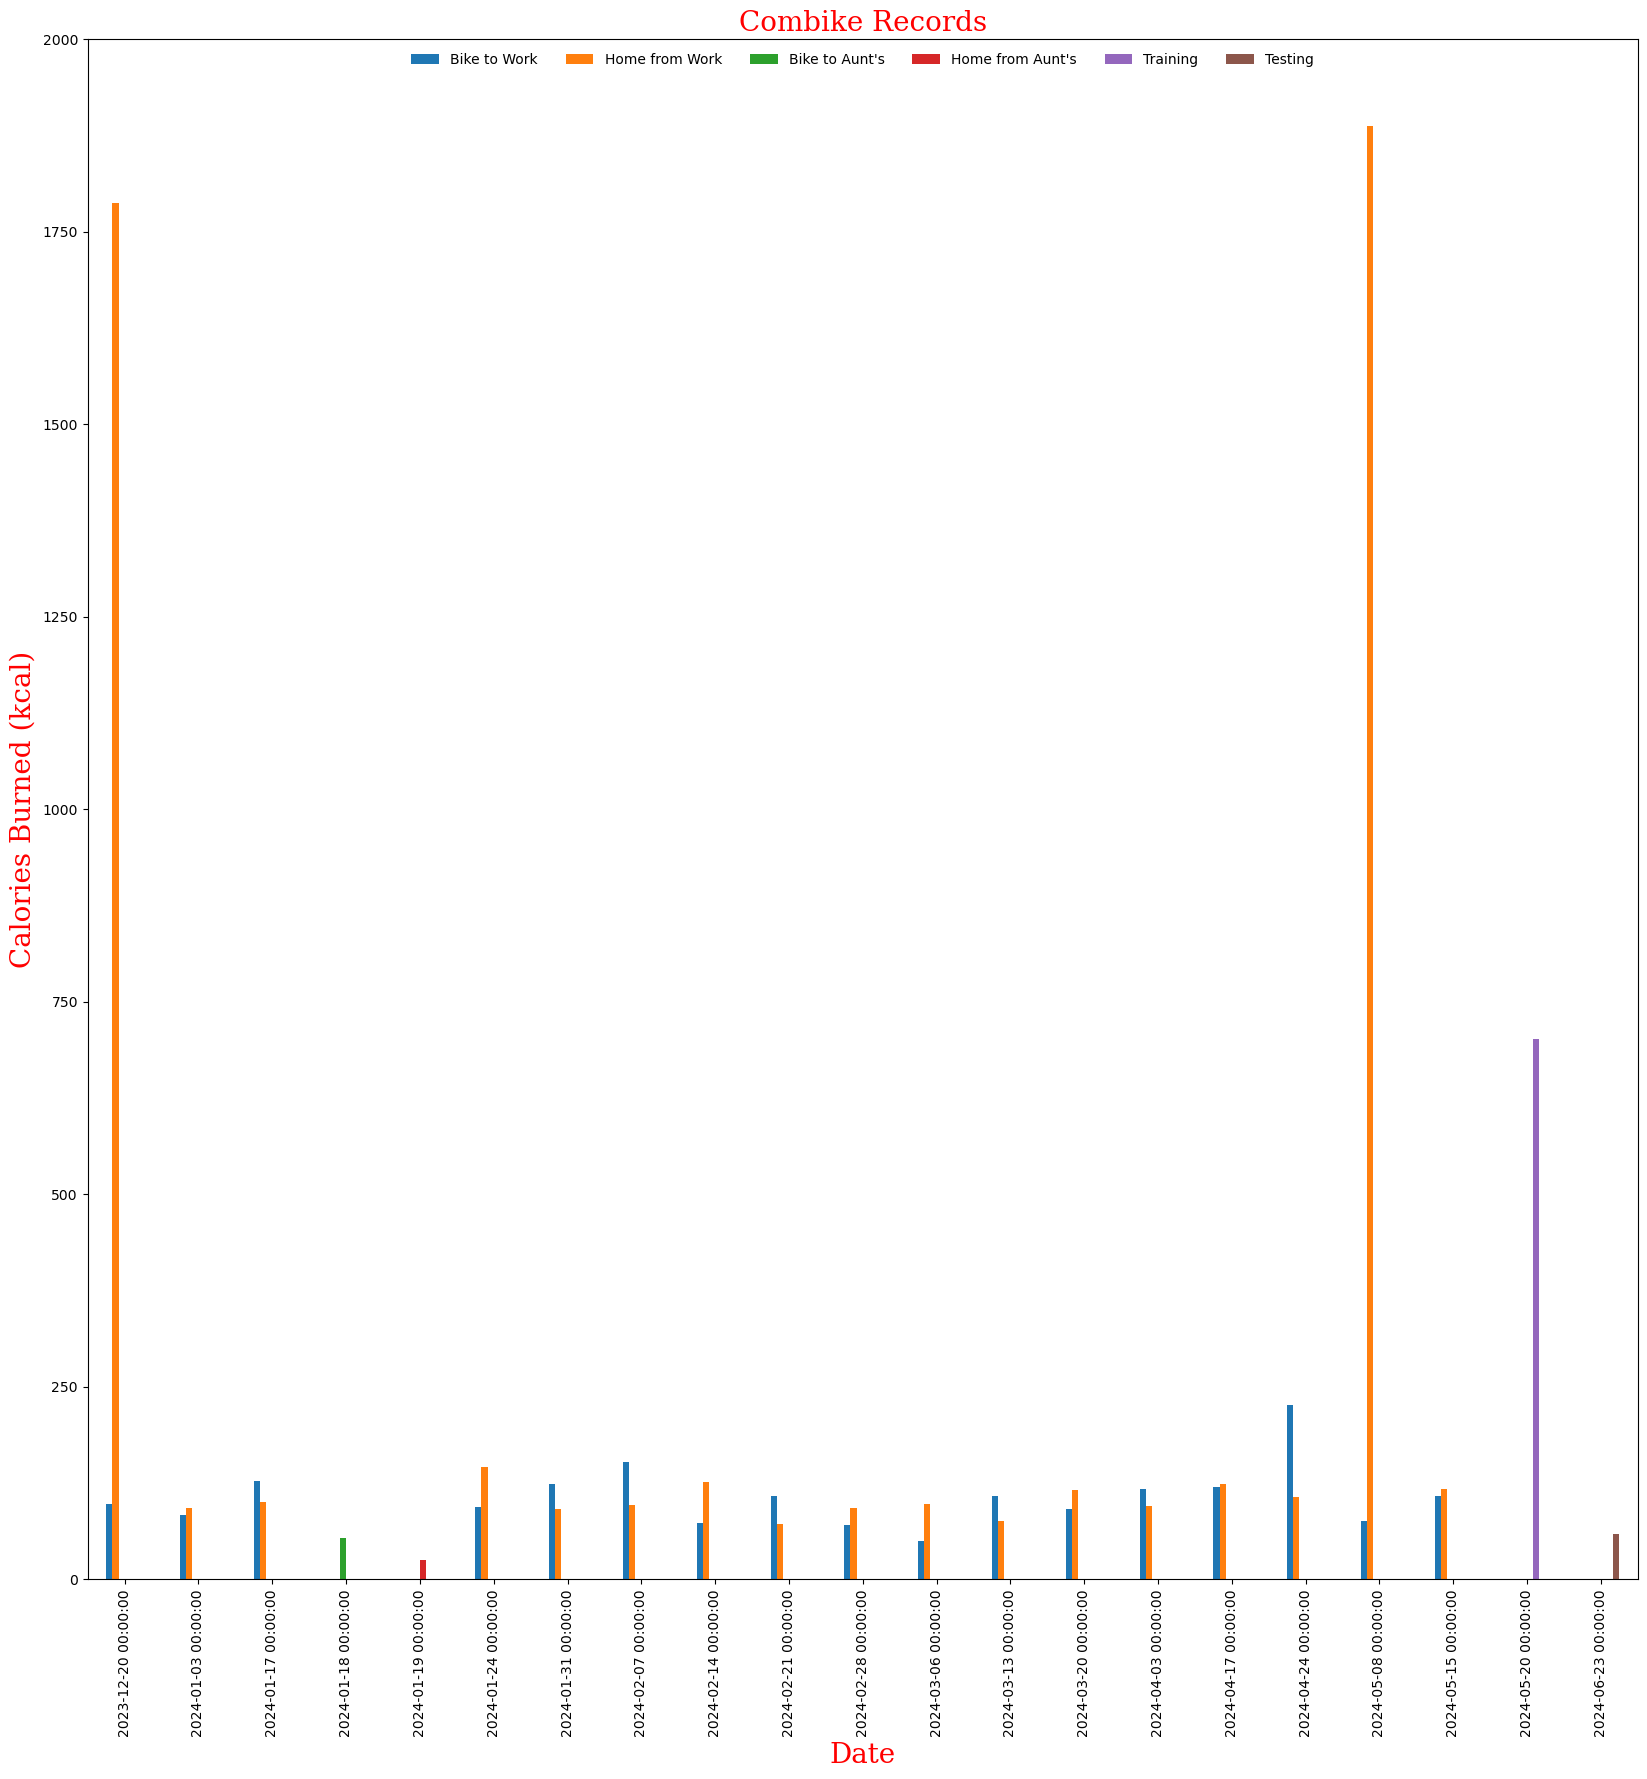

In [13]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
cbt.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Bike to Aunt's", "Home from Aunt's", "Training", "Testing"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Combike Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Calories Burned (kcal)', fontdict=f1)
plt.ylim(0, 2000)
plt.savefig("fig/cbt_combike.png")
plt.show()

In [14]:
d_b2w = cst.loc[cst["Purpose"] == "Bike to Work"].loc[:,"Distance"]
d_b2wd = d_b2w.to_frame(name="Bike to Work")
d_hfw = cst.loc[cst["Purpose"] == "Home from Work"].loc[:,"Distance"]
d_hfwd = d_hfw.to_frame(name="Home from Work")
d_b2a = cst.loc[cst["Purpose"] == "Bike to Aunt's"].loc[:,"Distance"]
d_b2ad = d_b2a.to_frame(name="Bike to Aunt's")
d_hfa = cst.loc[cst["Purpose"] == "Home from Aunt's"].loc[:,"Distance"]
d_hfad = d_hfa.to_frame(name="Home from Aunt's")
d_tra = cst.loc[cst["Purpose"] == "Training"].loc[:,"Distance"]
d_trad = d_tra.to_frame(name="Training")
d_tes = cst.loc[cst["Purpose"] == "Testing"].loc[:,"Distance"]
d_ted = d_tes.to_frame(name="Testing")
dlist = [d_b2wd, d_hfwd, d_b2ad, d_hfad, d_trad, d_ted]
dt = pd.concat(dlist, axis=1).fillna(0)
dt.columns = pd.MultiIndex.from_product([["Distance"], ["Bike to Work", "Home from Work", "Bike to Aunt's", "Home from Aunt's", "Training", "Testing"]])
dt.head() #distance total

Distance                                                 \
           Bike to Work Home from Work Bike to Aunt's Home from Aunt's   
Date                                                                     
2023-12-20          2.5            2.5            0.0              0.0   
2024-01-03          2.5            2.4            0.0              0.0   
2024-01-17          2.6            2.5            0.0              0.0   
2024-01-18          0.0            0.0            2.2              0.0   
2024-01-19          0.0            0.0            0.0              1.9   

                             
           Training Testing  
Date                         
2023-12-20      0.0     0.0  
2024-01-03      0.0     0.0  
2024-01-17      0.0     0.0  
2024-01-18      0.0     0.0  
2024-01-19      0.0     0.0

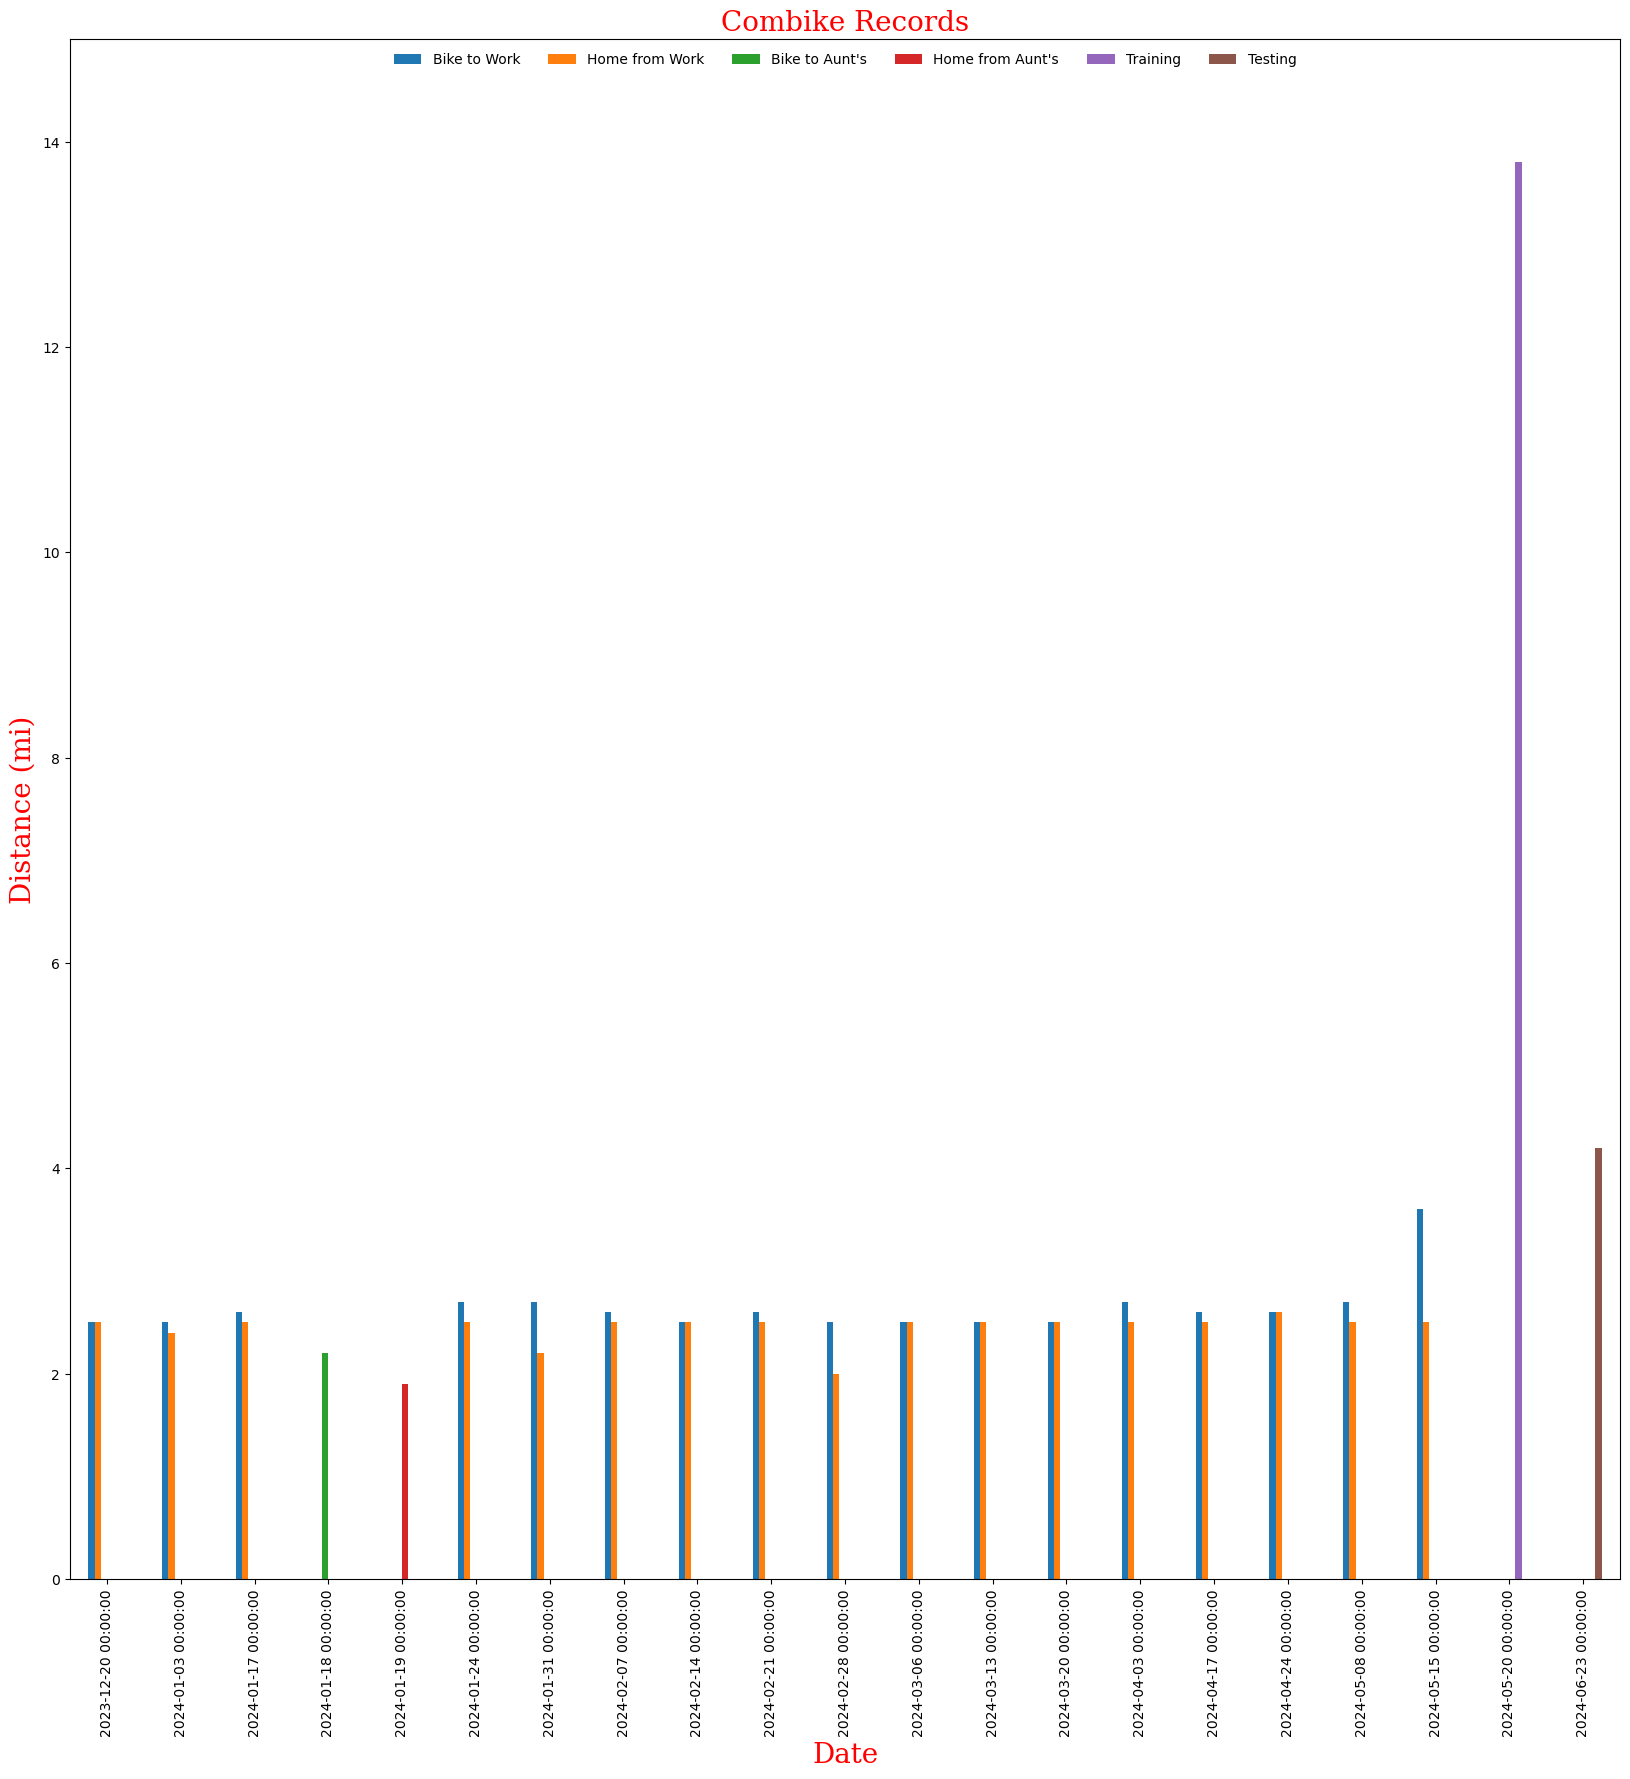

In [15]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
dt.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Bike to Aunt's", "Home from Aunt's", "Training", "Testing"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Combike Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Distance (mi)', fontdict=f1)
plt.ylim(0, 15)
plt.savefig("fig/dt_combike.png")
plt.show()

In [16]:
ma_b2w = cst.loc[cst["Purpose"] == "Bike to Work"].loc[:,"Max Altitude"]
ma_b2wd = ma_b2w.to_frame(name="Bike to Work")
ma_hfw = cst.loc[cst["Purpose"] == "Home from Work"].loc[:,"Max Altitude"]
ma_hfwd = ma_hfw.to_frame(name="Home from Work")
ma_b2a = cst.loc[cst["Purpose"] == "Bike to Aunt's"].loc[:,"Max Altitude"]
ma_b2ad = ma_b2a.to_frame(name="Bike to Aunt's")
ma_hfa = cst.loc[cst["Purpose"] == "Home from Aunt's"].loc[:,"Max Altitude"]
ma_hfad = ma_hfa.to_frame(name="Home from Aunt's")
ma_tra = cst.loc[cst["Purpose"] == "Training"].loc[:,"Max Altitude"]
ma_trad = ma_tra.to_frame(name="Training")
ma_tes = cst.loc[cst["Purpose"] == "Testing"].loc[:,"Max Altitude"]
ma_ted = ma_tes.to_frame(name="Testing")
dlist = [ma_b2wd, ma_hfwd, ma_b2ad, ma_hfad, ma_trad, ma_ted]
mat = pd.concat(dlist, axis=1).fillna(0)
mat.columns = pd.MultiIndex.from_product([["Max Altitude"], ["Bike to Work", "Home from Work", "Bike to Aunt's", "Home from Aunt's", "Training", "Testing"]])
mat.head() #max altitude total

Max Altitude                                                 \
           Bike to Work Home from Work Bike to Aunt's Home from Aunt's   
Date                                                                     
2023-12-20        377.0         1299.0            0.0              0.0   
2024-01-03        357.0          347.0            0.0              0.0   
2024-01-17        367.0          488.0            0.0              0.0   
2024-01-18          0.0            0.0          206.0              0.0   
2024-01-19          0.0            0.0            0.0            170.0   

                             
           Training Testing  
Date                         
2023-12-20      0.0     0.0  
2024-01-03      0.0     0.0  
2024-01-17      0.0     0.0  
2024-01-18      0.0     0.0  
2024-01-19      0.0     0.0

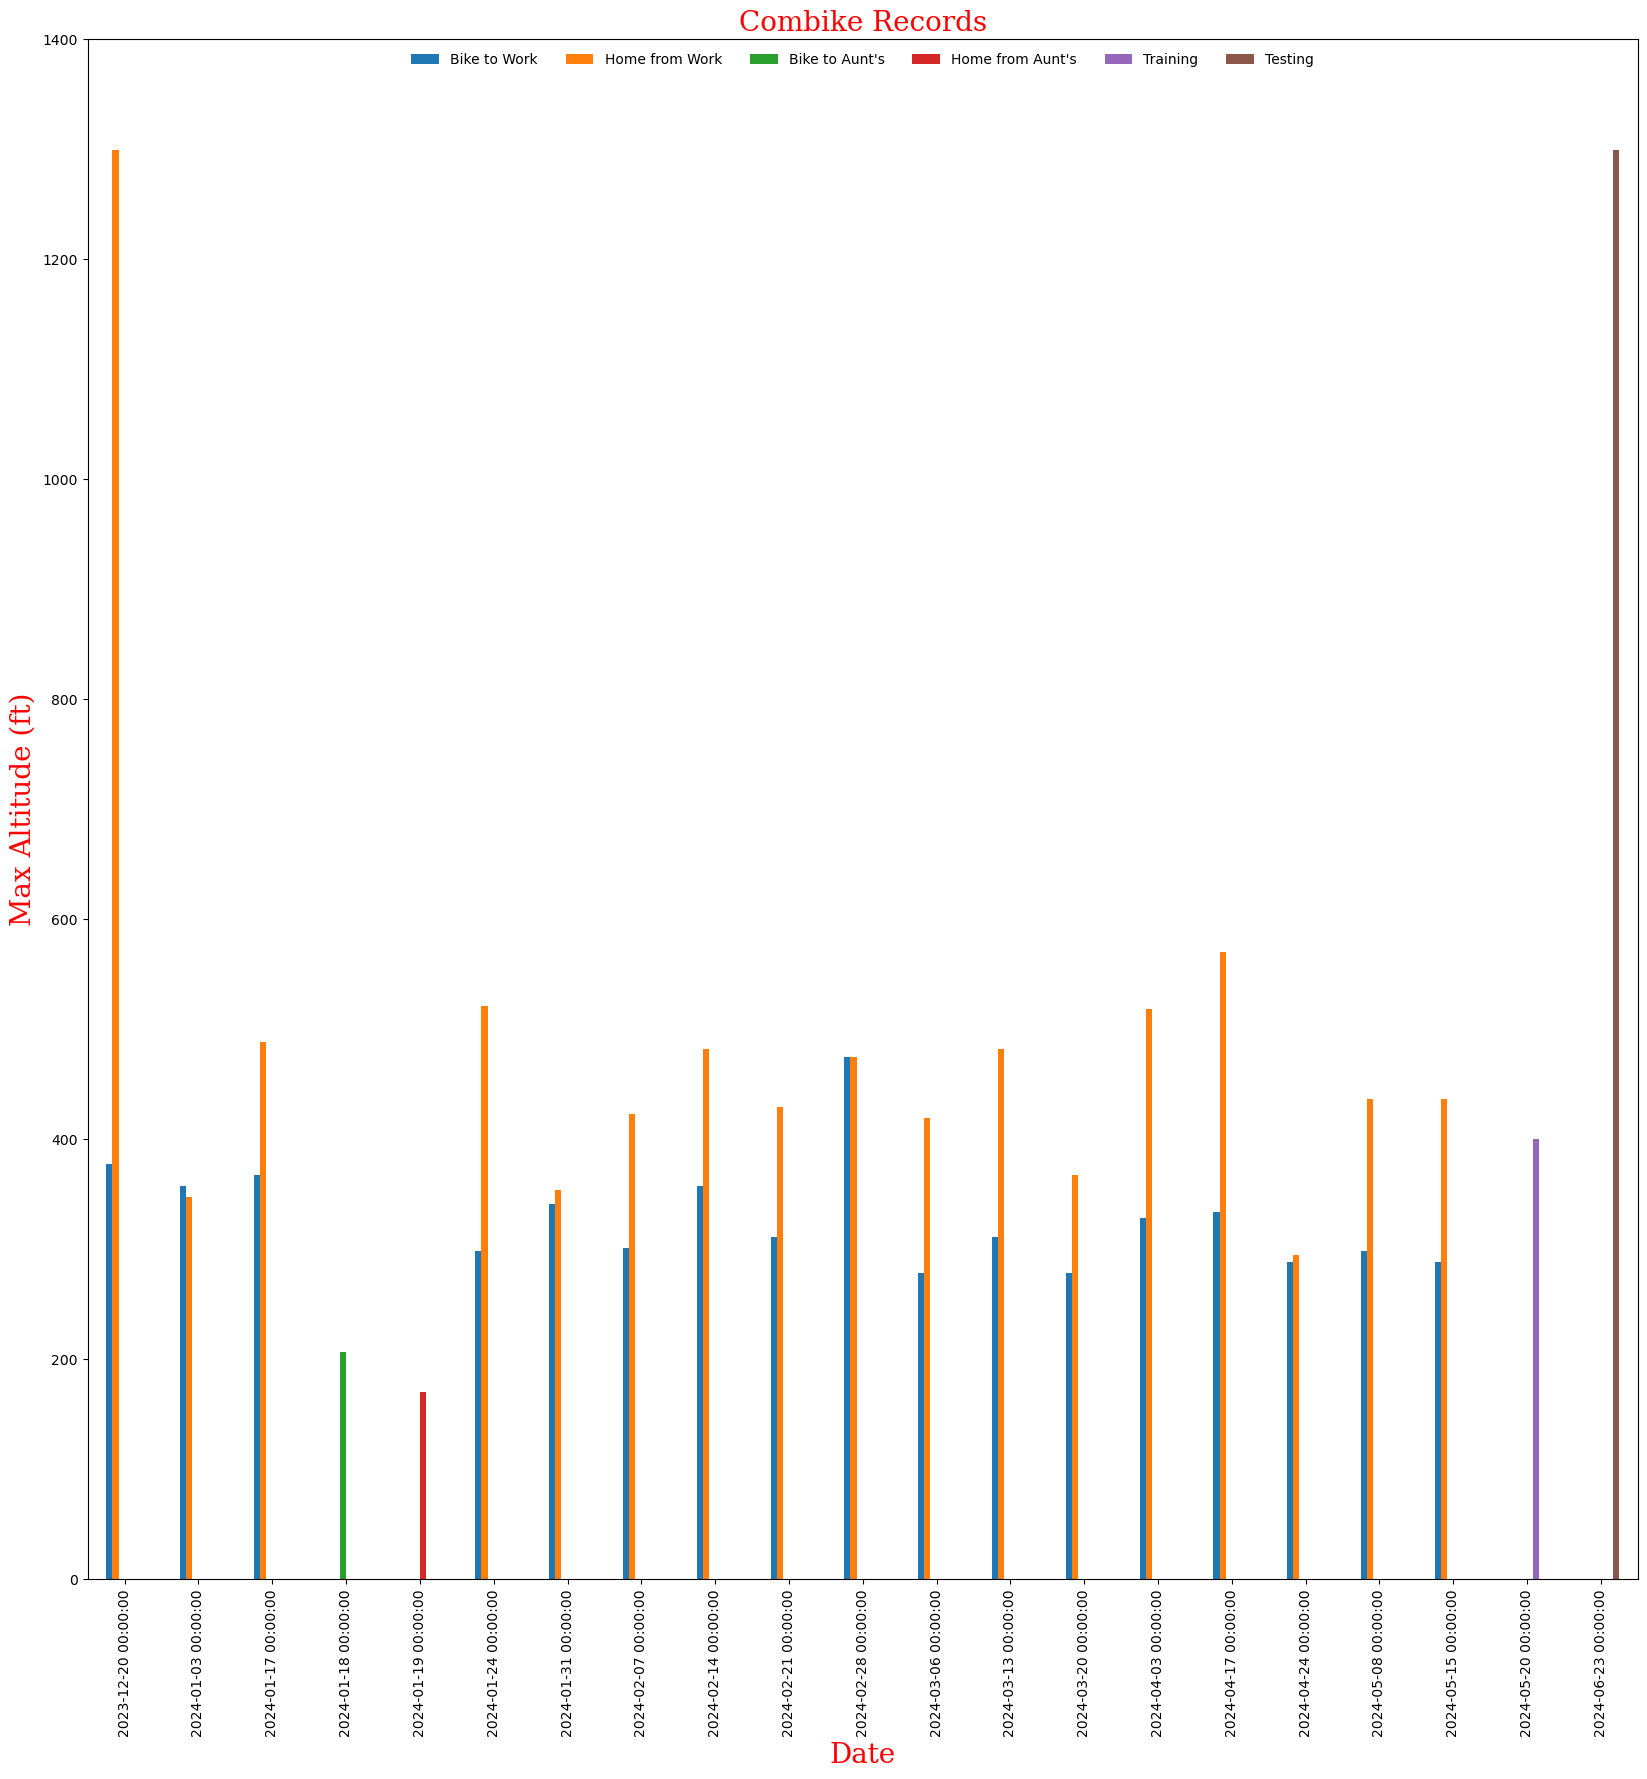

In [17]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
mat.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Bike to Aunt's", "Home from Aunt's", "Training", "Testing"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Combike Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Max Altitude (ft)', fontdict=f1)
plt.ylim(0, 1400)
plt.savefig("fig/mat_combike.png")
plt.show()

In [18]:
t_b2w = cst.loc[cst["Purpose"] == "Bike to Work"].loc[:,"Time"]
t_b2wd = t_b2w.to_frame(name="Bike to Work")
t_hfw = cst.loc[cst["Purpose"] == "Home from Work"].loc[:,"Time"]
t_hfwd = t_hfw.to_frame(name="Home from Work")
t_b2a = cst.loc[cst["Purpose"] == "Bike to Aunt's"].loc[:,"Time"]
t_b2ad = t_b2a.to_frame(name="Bike to Aunt's")
t_hfa = cst.loc[cst["Purpose"] == "Home from Aunt's"].loc[:,"Time"]
t_hfad = t_hfa.to_frame(name="Home from Aunt's")
t_tra = cst.loc[cst["Purpose"] == "Training"].loc[:,"Time"]
t_trad = t_tra.to_frame(name="Training")
t_tes = cst.loc[cst["Purpose"] == "Testing"].loc[:,"Time"]
t_ted = t_tes.to_frame(name="Testing")
dlist = [t_b2wd, t_hfwd, t_b2ad, t_hfad, t_trad, t_ted]
tt = pd.concat(dlist, axis=1).fillna(0)
tt.columns = pd.MultiIndex.from_product([["Time"], ["Bike to Work", "Home from Work", "Bike to Aunt's", "Home from Aunt's", "Training", "Testing"]])
tt.head() #time total

Time                                                 \
           Bike to Work Home from Work Bike to Aunt's Home from Aunt's   
Date                                                                     
2023-12-20       1591.0         1699.0            0.0              0.0   
2024-01-03       1327.0         1437.0            0.0              0.0   
2024-01-17       1979.0         1361.0            0.0              0.0   
2024-01-18          0.0            0.0         1081.0              0.0   
2024-01-19          0.0            0.0            0.0            751.0   

                             
           Training Testing  
Date                         
2023-12-20      0.0     0.0  
2024-01-03      0.0     0.0  
2024-01-17      0.0     0.0  
2024-01-18      0.0     0.0  
2024-01-19      0.0     0.0

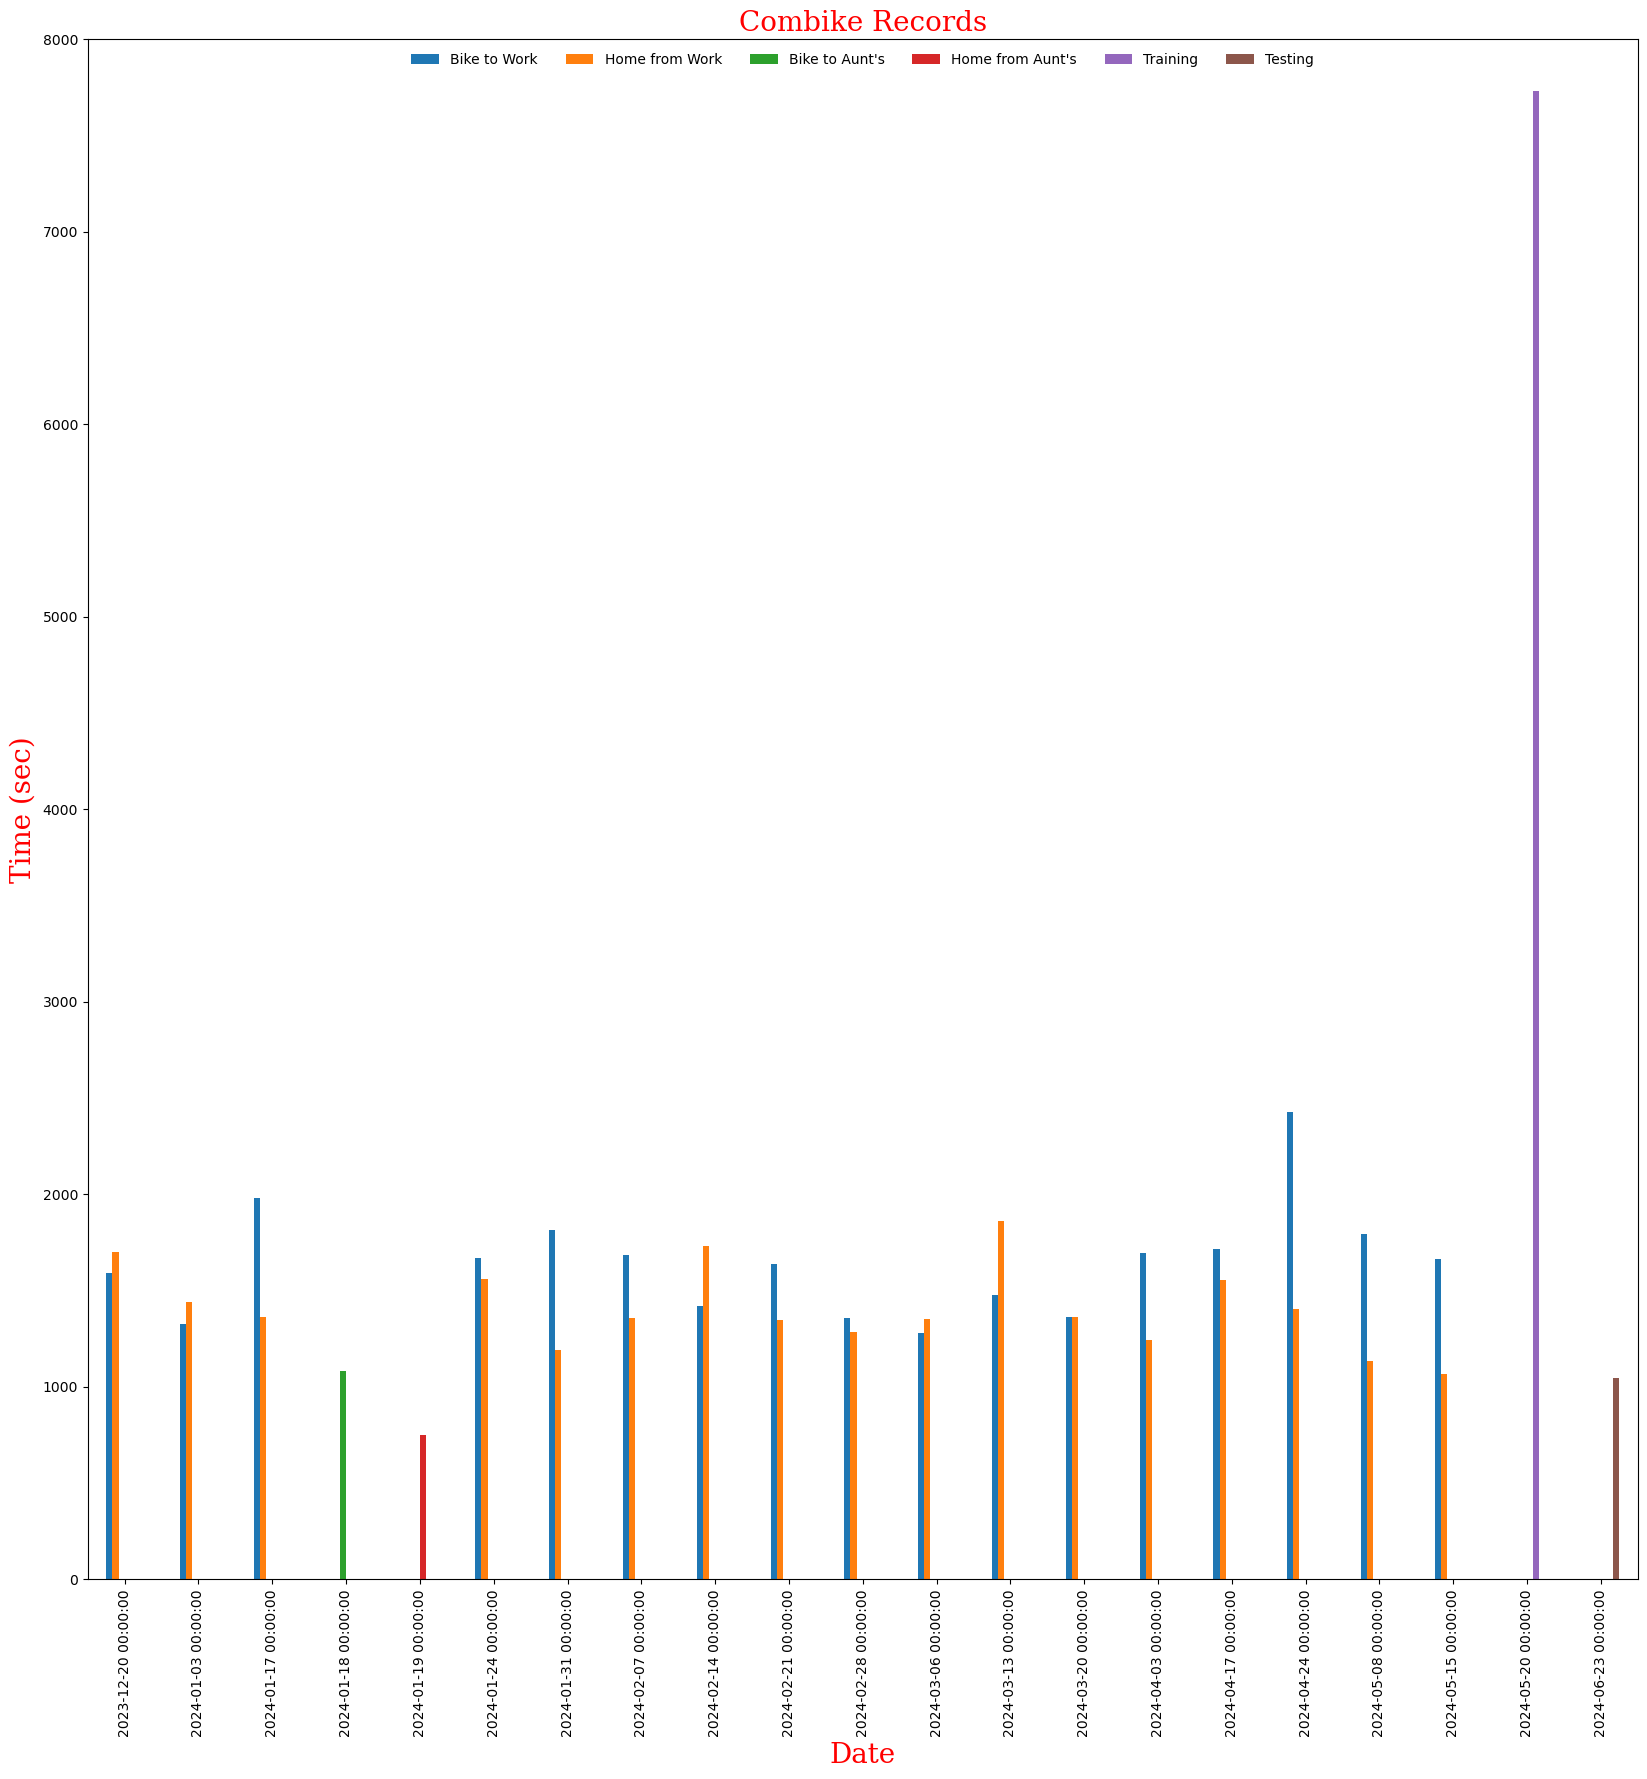

In [19]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
tt.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Bike to Aunt's", "Home from Aunt's", "Training", "Testing"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Combike Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Time (sec)', fontdict=f1)
plt.ylim(0, 8000)
plt.savefig("fig/tt_combike.png")
plt.show()

In [20]:
catt = pd.concat([ast, cbt, dt, mat, tt], axis=1)
catt.head() #category total merged

Average Speed                                                 \
            Bike to Work Home from Work Bike to Aunt's Home from Aunt's   
Date                                                                      
2023-12-20           8.8            9.7            0.0              0.0   
2024-01-03           8.2            8.2            0.0              0.0   
2024-01-17           6.6            8.3            0.0              0.0   
2024-01-18           0.0            0.0            8.5              0.0   
2024-01-19           0.0            0.0            0.0              9.9   

                            Calories Burned                                \
           Training Testing    Bike to Work Home from Work Bike to Aunt's   
Date                                                                        
2023-12-20      0.0     0.0            97.0         1787.0            0.0   
2024-01-03      0.0     0.0            83.0           92.0            0.0   
2024-01-17      0.0     0.0           127.0          100.0            0.0   
2024-01-18      0.0     0.0             0.0            0.0           54.0   
2024-01-19      0.0     0.0             0.0            0.0            0.0   

                             ...   Max Altitude                            \
           Home from Aunt's  ... Bike to Aunt's Home from Aunt's Training   
Date                         ...                                            
2023-12-20              0.0  ...            0.0              0.0      0.0   
2024-01-03              0.0  ...            0.0              0.0      0.0   
2024-01-17              0.0  ...            0.0              0.0      0.0   
2024-01-18              0.0  ...          206.0              0.0      0.0   
2024-01-19             25.0  ...            0.0            170.0      0.0   

                           Time                                \
           Testing Bike to Work Home from Work Bike to Aunt's   
Date                                                            
2023-12-20     0.0       1591.0         1699.0            0.0   
2024-01-03     0.0       1327.0         1437.0            0.0   
2024-01-17     0.0       1979.0         1361.0            0.0   
2024-01-18     0.0          0.0            0.0         1081.0   
2024-01-19     0.0          0.0            0.0            0.0   

                                              
           Home from Aunt's Training Testing  
Date                                          
2023-12-20              0.0      0.0     0.0  
2024-01-03              0.0      0.0     0.0  
2024-01-17              0.0      0.0     0.0  
2024-01-18              0.0      0.0     0.0  
2024-01-19            751.0      0.0     0.0  

[5 rows x 30 columns]

In [21]:
#Rankings Average Speed
asb2w_r = as_b2wd
asb2wr = asb2w_r["Bike to Work"].rank(ascending=False)
asb2w_r['B2WR'] = asb2wr
asb2w_r = asb2w_r.sort_values('B2WR').head(3)

ashfw_r = as_hfwd
ashfwr = ashfw_r["Home from Work"].rank(ascending=False)
ashfw_r['HFWR'] = ashfwr
ashfw_r = ashfw_r.sort_values('HFWR').head(3)

asb2a_r = as_b2ad
asb2ar = asb2a_r["Bike to Aunt's"].rank(ascending=False)
asb2a_r['B2AR'] = asb2ar
asb2a_r = asb2a_r.sort_values('B2AR').head(3)

ashfa_r = as_hfad
ashfar = ashfa_r["Home from Aunt's"].rank(ascending=False)
ashfa_r['HFAR'] = ashfar
ashfa_r = ashfa_r.sort_values('HFAR').head(3)

astra_r = as_trad
astrar = astra_r["Training"].rank(ascending=False)
astra_r['TRAR'] = astrar
astra_r = astra_r.sort_values('TRAR').head(3)

astes_r = as_ted
astesr = astes_r["Testing"].rank(ascending=False)
astes_r['TESR'] = astesr
astes_r = astes_r.sort_values('TESR').head(3)

aslistr = [asb2w_r, ashfw_r, asb2a_r, ashfa_r, astra_r, astes_r]
astr = pd.concat(aslistr, axis=1).fillna('0').sort_values(['B2WR', 'HFWR', 'B2AR', 'HFAR', 'TRAR', 'TESR'], ascending=[True,True,True,True,True,True])
astr.columns = pd.MultiIndex.from_product([["Average Speed"], ["Bike to Work", "B2WR", "Home from Work", "HFWR", "Bike to Aunt's", "B2AR", "Home from Aunt's", "HFAR", "Training", "TRAR", "Testing", "TESR"]])
astr = astr.iloc[:, [0,2,4,6,8,10]].astype(float)
astr #average speed total rank

Average Speed                                                 \
            Bike to Work Home from Work Bike to Aunt's Home from Aunt's   
Date                                                                      
2024-05-15           9.4           10.4            0.0              0.0   
2023-12-20           8.8            9.7            0.0              0.0   
2024-01-31           8.6            9.5            0.0              0.0   
2024-01-18           0.0            0.0            8.5              0.0   
2024-01-19           0.0            0.0            0.0              9.9   
2024-05-20           0.0            0.0            0.0              0.0   
2024-06-23           0.0            0.0            0.0              0.0   

                             
           Training Testing  
Date                         
2024-05-15      0.0     0.0  
2023-12-20      0.0     0.0  
2024-01-31      0.0     0.0  
2024-01-18      0.0     0.0  
2024-01-19      0.0     0.0  
2024-05-20      9.0     0.0  
2024-06-23      0.0     8.4

In [22]:
#Rankings Calories Burned
cbb2w_r = cb_b2wd
cbb2wr = cbb2w_r["Bike to Work"].rank(ascending=False)
cbb2w_r['B2WR'] = cbb2wr
cbb2w_r = cbb2w_r.sort_values('B2WR').head(3)

cbhfw_r = cb_hfwd
cbhfwr = cbhfw_r["Home from Work"].rank(ascending=False)
cbhfw_r['HFWR'] = cbhfwr
cbhfw_r = cbhfw_r.sort_values('HFWR').head(3)

cbb2a_r = cb_b2ad
cbb2ar = cbb2a_r["Bike to Aunt's"].rank(ascending=False)
cbb2a_r['B2AR'] = cbb2ar
cbb2a_r = cbb2a_r.sort_values('B2AR').head(3)

cbhfa_r = cb_hfad
cbhfar = cbhfa_r["Home from Aunt's"].rank(ascending=False)
cbhfa_r['HFAR'] = cbhfar
cbhfa_r = cbhfa_r.sort_values('HFAR').head(3)

cbtra_r = cb_trad
cbtrar = cbtra_r["Training"].rank(ascending=False)
cbtra_r['TRAR'] = cbtrar
cbtra_r = cbtra_r.sort_values('TRAR').head(3)

cbtes_r = cb_ted
cbtesr = cbtes_r["Testing"].rank(ascending=False)
cbtes_r['TESR'] = cbtesr
cbtes_r = cbtes_r.sort_values('TESR').head(3)

cblistr = [cbb2w_r, cbhfw_r, cbb2a_r, cbhfa_r, cbtra_r, cbtes_r]
cbtr = pd.concat(cblistr, axis=1).fillna('0').sort_values(['B2WR', 'HFWR', 'B2AR', 'HFAR', 'TRAR', 'TESR'], ascending=[True,True,True,True,True,True])
cbtr.columns = pd.MultiIndex.from_product([["Calories Burned"], ["Bike to Work", "B2WR", "Home from Work", "HFWR", "Bike to Aunt's", "B2AR", "Home from Aunt's", "HFAR", "Training", "TRAR", "Testing", "TESR"]])
cbtr = cbtr.iloc[:, [0,2,4,6,8,10]].astype(float)
cbtr #calories burned total rank

Calories Burned                                                 \
              Bike to Work Home from Work Bike to Aunt's Home from Aunt's   
Date                                                                        
2024-04-24           226.0            0.0            0.0              0.0   
2024-02-07           152.0            0.0            0.0              0.0   
2024-01-17           127.0            0.0            0.0              0.0   
2024-05-08             0.0         1887.0            0.0              0.0   
2023-12-20             0.0         1787.0            0.0              0.0   
2024-01-24             0.0          146.0            0.0              0.0   
2024-01-18             0.0            0.0           54.0              0.0   
2024-01-19             0.0            0.0            0.0             25.0   
2024-05-20             0.0            0.0            0.0              0.0   
2024-06-23             0.0            0.0            0.0              0.0   

                             
           Training Testing  
Date                         
2024-04-24      0.0     0.0  
2024-02-07      0.0     0.0  
2024-01-17      0.0     0.0  
2024-05-08      0.0     0.0  
2023-12-20      0.0     0.0  
2024-01-24      0.0     0.0  
2024-01-18      0.0     0.0  
2024-01-19      0.0     0.0  
2024-05-20    701.0     0.0  
2024-06-23      0.0    59.0

In [23]:
#Rankings Distance
db2w_r = d_b2wd
db2wr = db2w_r["Bike to Work"].rank(ascending=False)
db2w_r['B2WR'] = db2wr
db2w_r = db2w_r.sort_values('B2WR').head(3)

dhfw_r = d_hfwd
dhfwr = dhfw_r["Home from Work"].rank(ascending=False)
dhfw_r['HFWR'] = dhfwr
dhfw_r = dhfw_r.sort_values('HFWR').head(3)

db2a_r = d_b2ad
db2ar = db2a_r["Bike to Aunt's"].rank(ascending=False)
db2a_r['B2AR'] = db2ar
db2a_r = db2a_r.sort_values('B2AR').head(3)

dhfa_r = d_hfad
dhfar = dhfa_r["Home from Aunt's"].rank(ascending=False)
dhfa_r['HFAR'] = dhfar
dhfa_r = dhfa_r.sort_values('HFAR').head(3)

dtra_r = d_trad
dtrar = dtra_r["Training"].rank(ascending=False)
dtra_r['TRAR'] = dtrar
dtra_r = dtra_r.sort_values('TRAR').head(3)

dtes_r = d_ted
dtesr = dtes_r["Testing"].rank(ascending=False)
dtes_r['TESR'] = dtesr
dtes_r = dtes_r.sort_values('TESR').head(3)

dlistr = [db2w_r, dhfw_r, db2a_r, dhfa_r, dtra_r, dtes_r]
dtr = pd.concat(dlistr, axis=1).fillna('0').sort_values(['B2WR', 'HFWR', 'B2AR', 'HFAR', 'TRAR', 'TESR'], ascending=[True,True,True,True,True,True])
dtr.columns = pd.MultiIndex.from_product([["Distance"], ["Bike to Work", "B2WR", "Home from Work", "HFWR", "Bike to Aunt's", "B2AR", "Home from Aunt's", "HFAR", "Training", "TRAR", "Testing", "TESR"]])
dtr = dtr.iloc[:, [0,2,4,6,8,10]].astype(float)
dtr #distance total rank

Distance                                                 \
           Bike to Work Home from Work Bike to Aunt's Home from Aunt's   
Date                                                                     
2024-05-15          3.6            0.0            0.0              0.0   
2024-01-24          2.7            0.0            0.0              0.0   
2024-01-31          2.7            0.0            0.0              0.0   
2024-04-24          0.0            2.6            0.0              0.0   
2023-12-20          0.0            2.5            0.0              0.0   
2024-04-17          0.0            2.5            0.0              0.0   
2024-01-18          0.0            0.0            2.2              0.0   
2024-01-19          0.0            0.0            0.0              1.9   
2024-05-20          0.0            0.0            0.0              0.0   
2024-06-23          0.0            0.0            0.0              0.0   

                             
           Training Testing  
Date                         
2024-05-15      0.0     0.0  
2024-01-24      0.0     0.0  
2024-01-31      0.0     0.0  
2024-04-24      0.0     0.0  
2023-12-20      0.0     0.0  
2024-04-17      0.0     0.0  
2024-01-18      0.0     0.0  
2024-01-19      0.0     0.0  
2024-05-20     13.8     0.0  
2024-06-23      0.0     4.2

In [24]:
#Rankings Max Altitude
mab2w_r = ma_b2wd
mab2wr = mab2w_r["Bike to Work"].rank(ascending=False)
mab2w_r['B2WR'] = mab2wr
mab2w_r = mab2w_r.sort_values('B2WR').head(3)

mahfw_r = ma_hfwd
mahfwr = mahfw_r["Home from Work"].rank(ascending=False)
mahfw_r['HFWR'] = mahfwr
mahfw_r = mahfw_r.sort_values('HFWR').head(3)

mab2a_r = ma_b2ad
mab2ar = mab2a_r["Bike to Aunt's"].rank(ascending=False)
mab2a_r['B2AR'] = mab2ar
mab2a_r = mab2a_r.sort_values('B2AR').head(3)

mahfa_r = ma_hfad
mahfar = mahfa_r["Home from Aunt's"].rank(ascending=False)
mahfa_r['HFAR'] = mahfar
mahfa_r = mahfa_r.sort_values('HFAR').head(3)

matra_r = ma_trad
matrar = matra_r["Training"].rank(ascending=False)
matra_r['TRAR'] = matrar
matra_r = matra_r.sort_values('TRAR').head(3)

mates_r = ma_ted
matesr = mates_r["Testing"].rank(ascending=False)
mates_r['TESR'] = matesr
mates_r = mates_r.sort_values('TESR').head(3)

malistr = [mab2w_r, mahfw_r, mab2a_r, mahfa_r, matra_r, mates_r]
matr = pd.concat(malistr, axis=1).fillna('0').sort_values(['B2WR', 'HFWR', 'B2AR', 'HFAR', 'TRAR', 'TESR'], ascending=[True,True,True,True,True,True])
matr.columns = pd.MultiIndex.from_product([["Max Altitude"], ["Bike to Work", "B2WR", "Home from Work", "HFWR", "Bike to Aunt's", "B2AR", "Home from Aunt's", "HFAR", "Training", "TRAR", "Testing", "TESR"]])
matr = matr.iloc[:, [0,2,4,6,8,10]].astype(float)
matr #max altitude total rank

Max Altitude                                                 \
           Bike to Work Home from Work Bike to Aunt's Home from Aunt's   
Date                                                                     
2024-02-28        475.0            0.0            0.0              0.0   
2023-12-20        377.0         1299.0            0.0              0.0   
2024-01-17        367.0            0.0            0.0              0.0   
2024-04-17          0.0          570.0            0.0              0.0   
2024-01-24          0.0          521.0            0.0              0.0   
2024-01-18          0.0            0.0          206.0              0.0   
2024-01-19          0.0            0.0            0.0            170.0   
2024-05-20          0.0            0.0            0.0              0.0   
2024-06-23          0.0            0.0            0.0              0.0   

                             
           Training Testing  
Date                         
2024-02-28      0.0     0.0  
2023-12-20      0.0     0.0  
2024-01-17      0.0     0.0  
2024-04-17      0.0     0.0  
2024-01-24      0.0     0.0  
2024-01-18      0.0     0.0  
2024-01-19      0.0     0.0  
2024-05-20    400.0     0.0  
2024-06-23      0.0  1299.0

In [25]:
#Rankings Time
tb2w_r = t_b2wd
tb2wr = tb2w_r["Bike to Work"].rank(ascending=True)
tb2w_r['B2WR'] = tb2wr
tb2w_r = tb2w_r.sort_values('B2WR').head(3)

thfw_r = t_hfwd
thfwr = thfw_r["Home from Work"].rank(ascending=True)
thfw_r['HFWR'] = thfwr
thfw_r = thfw_r.sort_values('HFWR').head(3)

tb2a_r = t_b2ad
tb2ar = tb2a_r["Bike to Aunt's"].rank(ascending=True)
tb2a_r['B2AR'] = tb2ar
tb2a_r = tb2a_r.sort_values('B2AR').head(3)

thfa_r = t_hfad
thfar = thfa_r["Home from Aunt's"].rank(ascending=True)
thfa_r['HFAR'] = thfar
thfa_r = thfa_r.sort_values('HFAR').head(3)

ttra_r = t_trad
ttrar = ttra_r["Training"].rank(ascending=True)
ttra_r['TRAR'] = ttrar
ttra_r = ttra_r.sort_values('TRAR').head(3)

ttes_r = t_ted
ttesr = ttes_r["Testing"].rank(ascending=True)
ttes_r['TESR'] = ttesr
ttes_r = ttes_r.sort_values('TESR').head(3)

tlistr = [tb2w_r, thfw_r, tb2a_r, thfa_r, ttra_r, ttes_r]
ttr = pd.concat(tlistr, axis=1).fillna('0').sort_values(['B2WR', 'HFWR', 'B2AR', 'HFAR', 'TRAR', 'TESR'], ascending=[True,True,True,True,True,True])
ttr.columns = pd.MultiIndex.from_product([["Time"], ["Bike to Work", "B2WR", "Home from Work", "HFWR", "Bike to Aunt's", "B2AR", "Home from Aunt's", "HFAR", "Training", "TRAR", "Testing", "TESR"]])
ttr = ttr.iloc[:, [0,2,4,6,8,10]].astype(float)
ttr #time total rank

Time                                                 \
           Bike to Work Home from Work Bike to Aunt's Home from Aunt's   
Date                                                                     
2024-03-06       1278.0            0.0            0.0              0.0   
2024-01-03       1327.0            0.0            0.0              0.0   
2024-02-28       1357.0            0.0            0.0              0.0   
2024-05-15          0.0         1067.0            0.0              0.0   
2024-05-08          0.0         1133.0            0.0              0.0   
2024-01-31          0.0         1190.0            0.0              0.0   
2024-01-18          0.0            0.0         1081.0              0.0   
2024-01-19          0.0            0.0            0.0            751.0   
2024-05-20          0.0            0.0            0.0              0.0   
2024-06-23          0.0            0.0            0.0              0.0   

                             
           Training Testing  
Date                         
2024-03-06      0.0     0.0  
2024-01-03      0.0     0.0  
2024-02-28      0.0     0.0  
2024-05-15      0.0     0.0  
2024-05-08      0.0     0.0  
2024-01-31      0.0     0.0  
2024-01-18      0.0     0.0  
2024-01-19      0.0     0.0  
2024-05-20   7729.0     0.0  
2024-06-23      0.0  1047.0

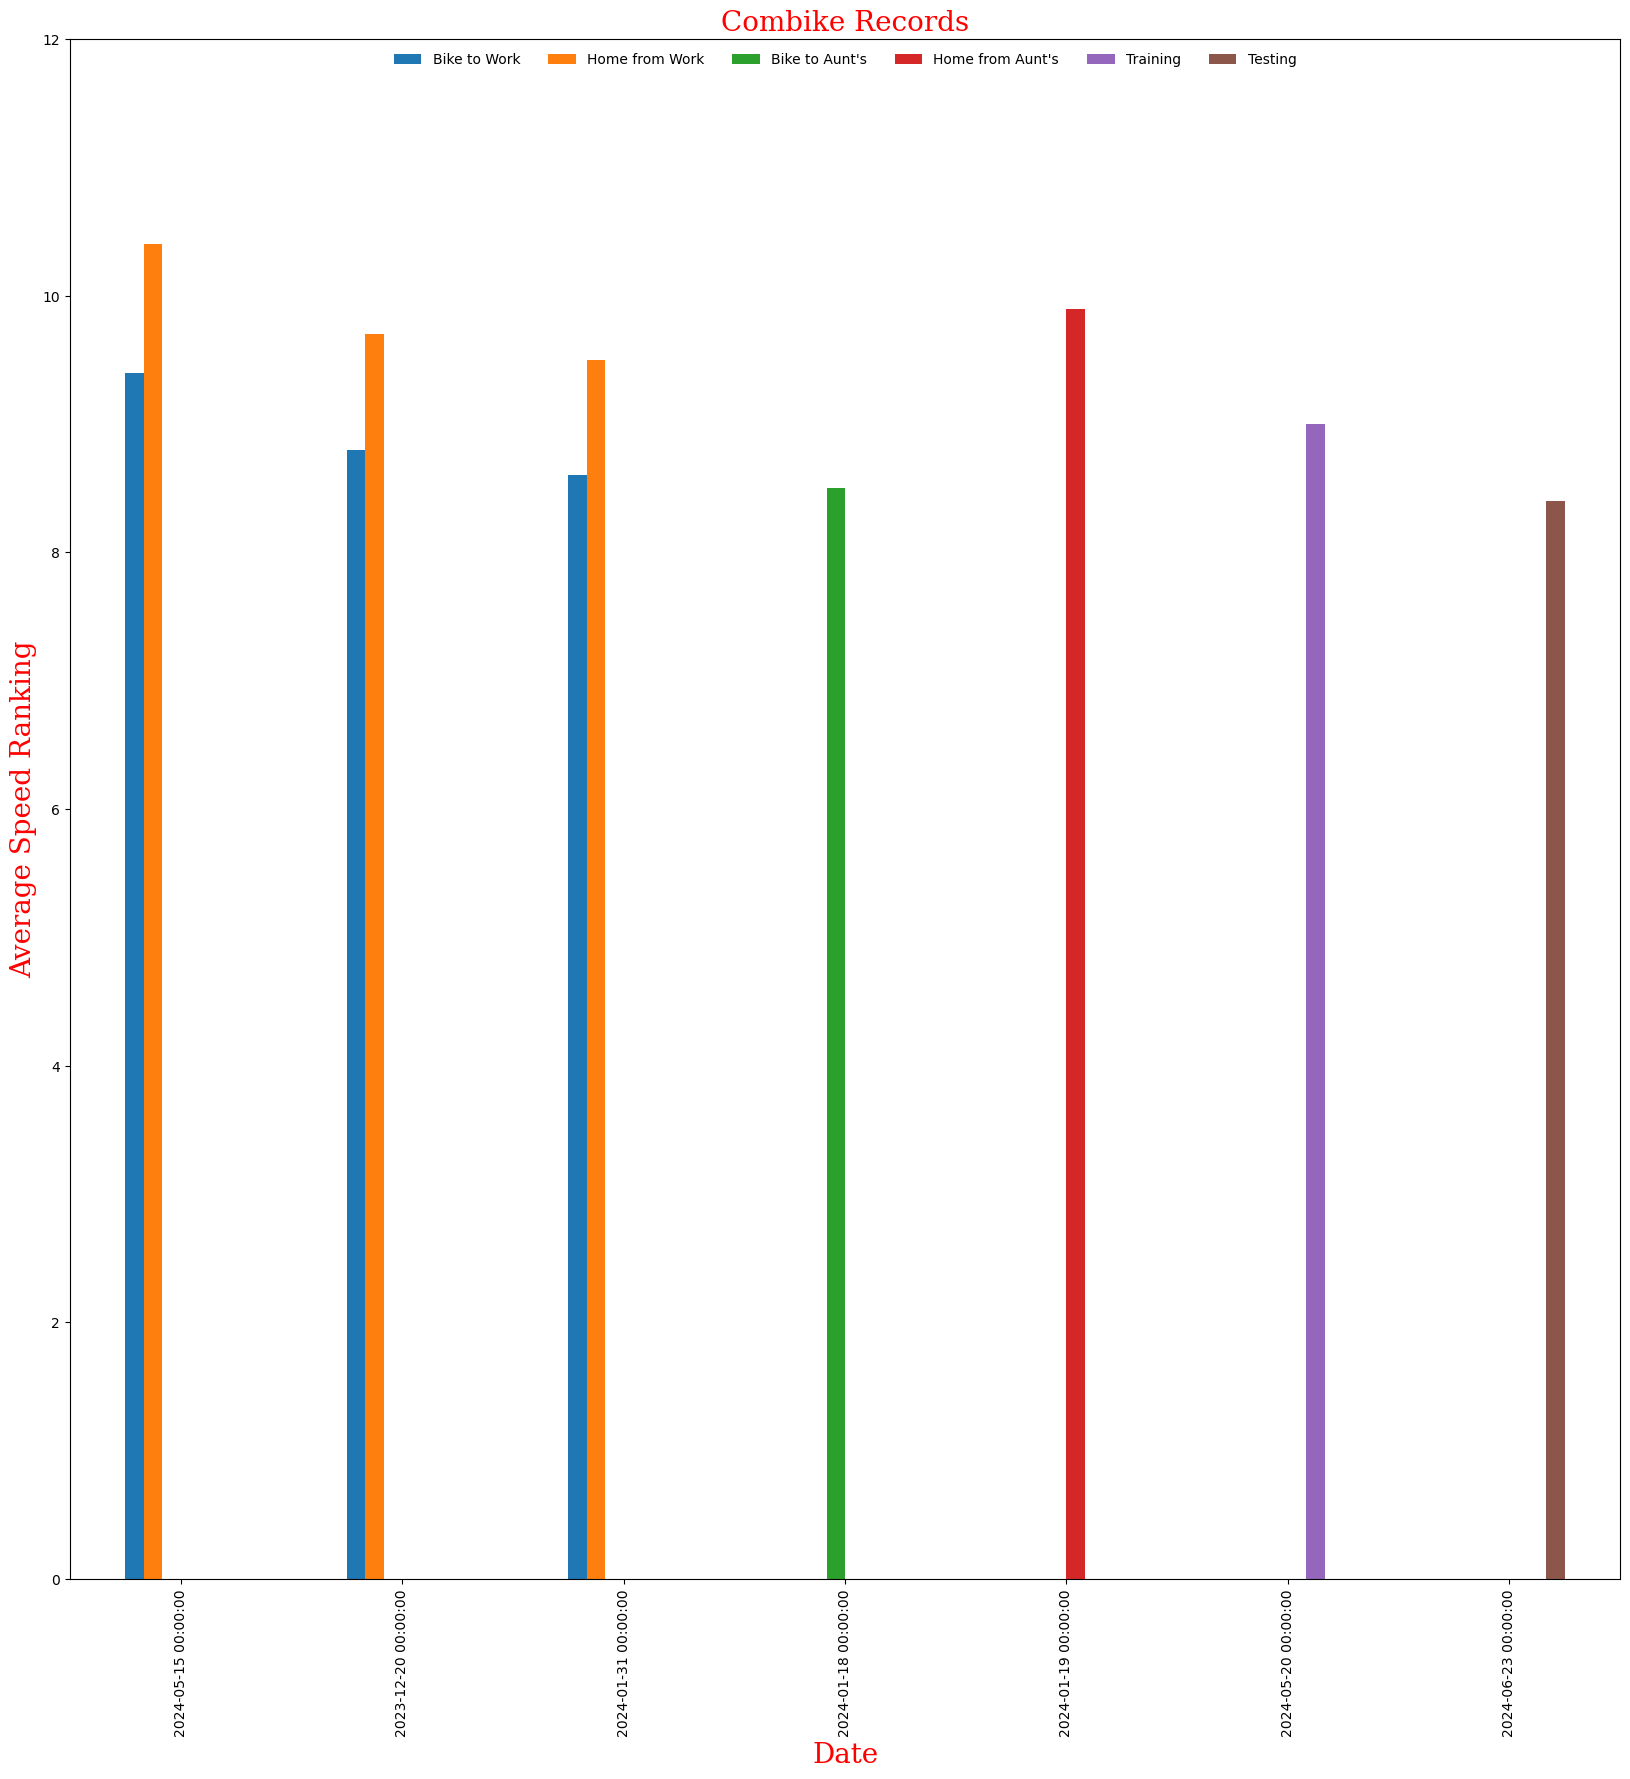

In [26]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
astr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Bike to Aunt's", "Home from Aunt's", "Training", "Testing"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Combike Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Average Speed Ranking', fontdict=f1)
plt.ylim(0, 12)
plt.savefig("fig/astr_combike.png")
plt.show()

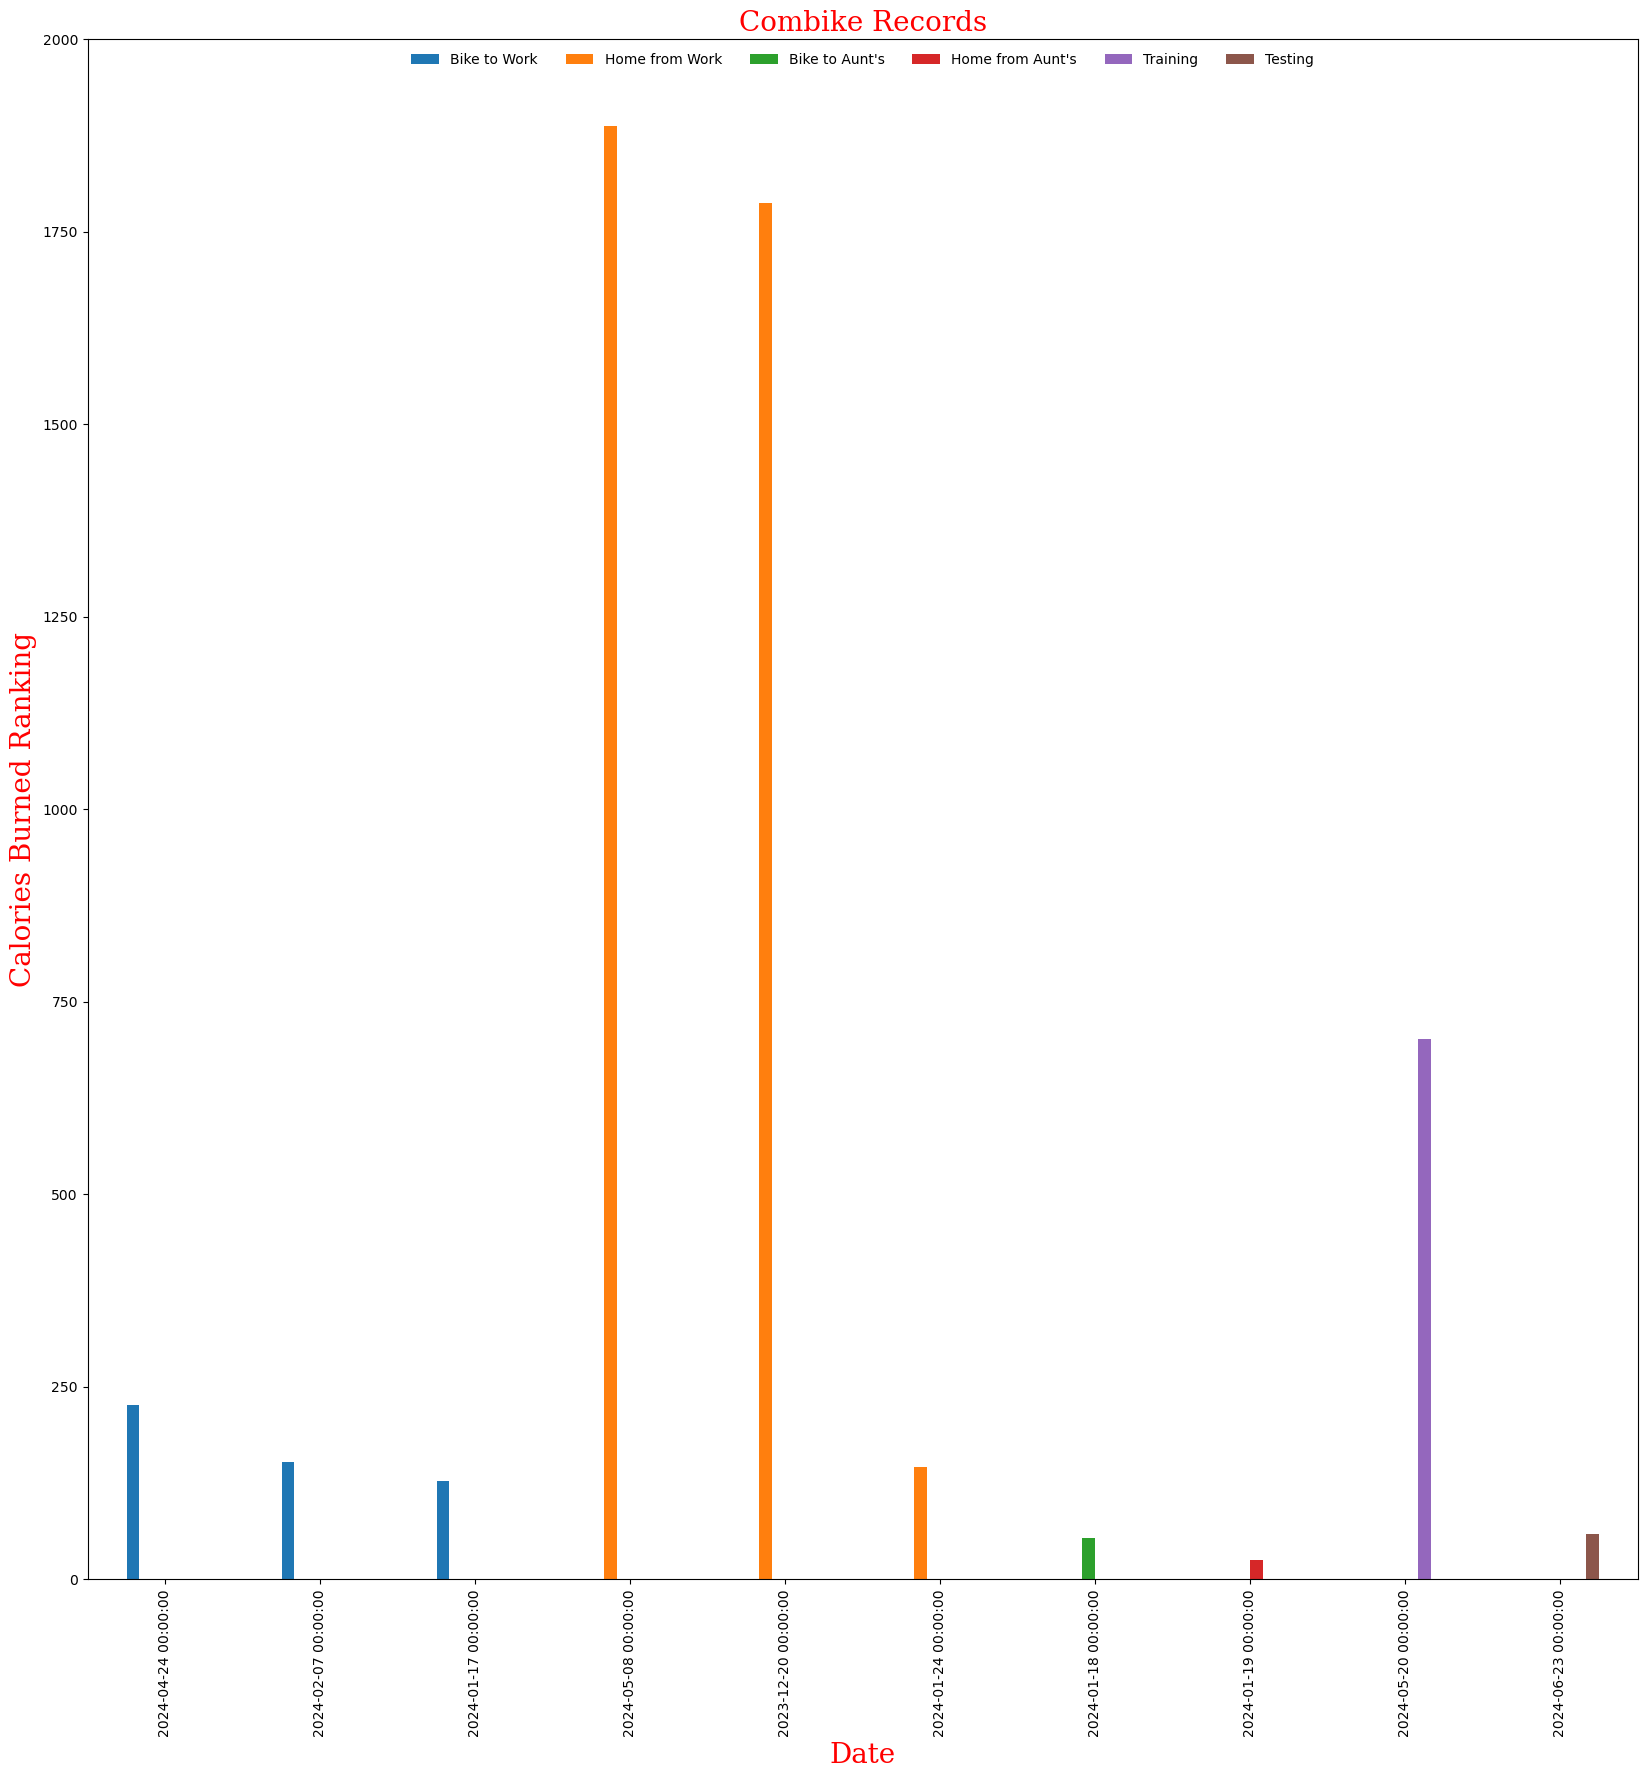

In [27]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
cbtr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Bike to Aunt's", "Home from Aunt's", "Training", "Testing"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Combike Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Calories Burned Ranking', fontdict=f1)
plt.ylim(0, 2000)
plt.savefig("fig/cbtr_combike.png")
plt.show()

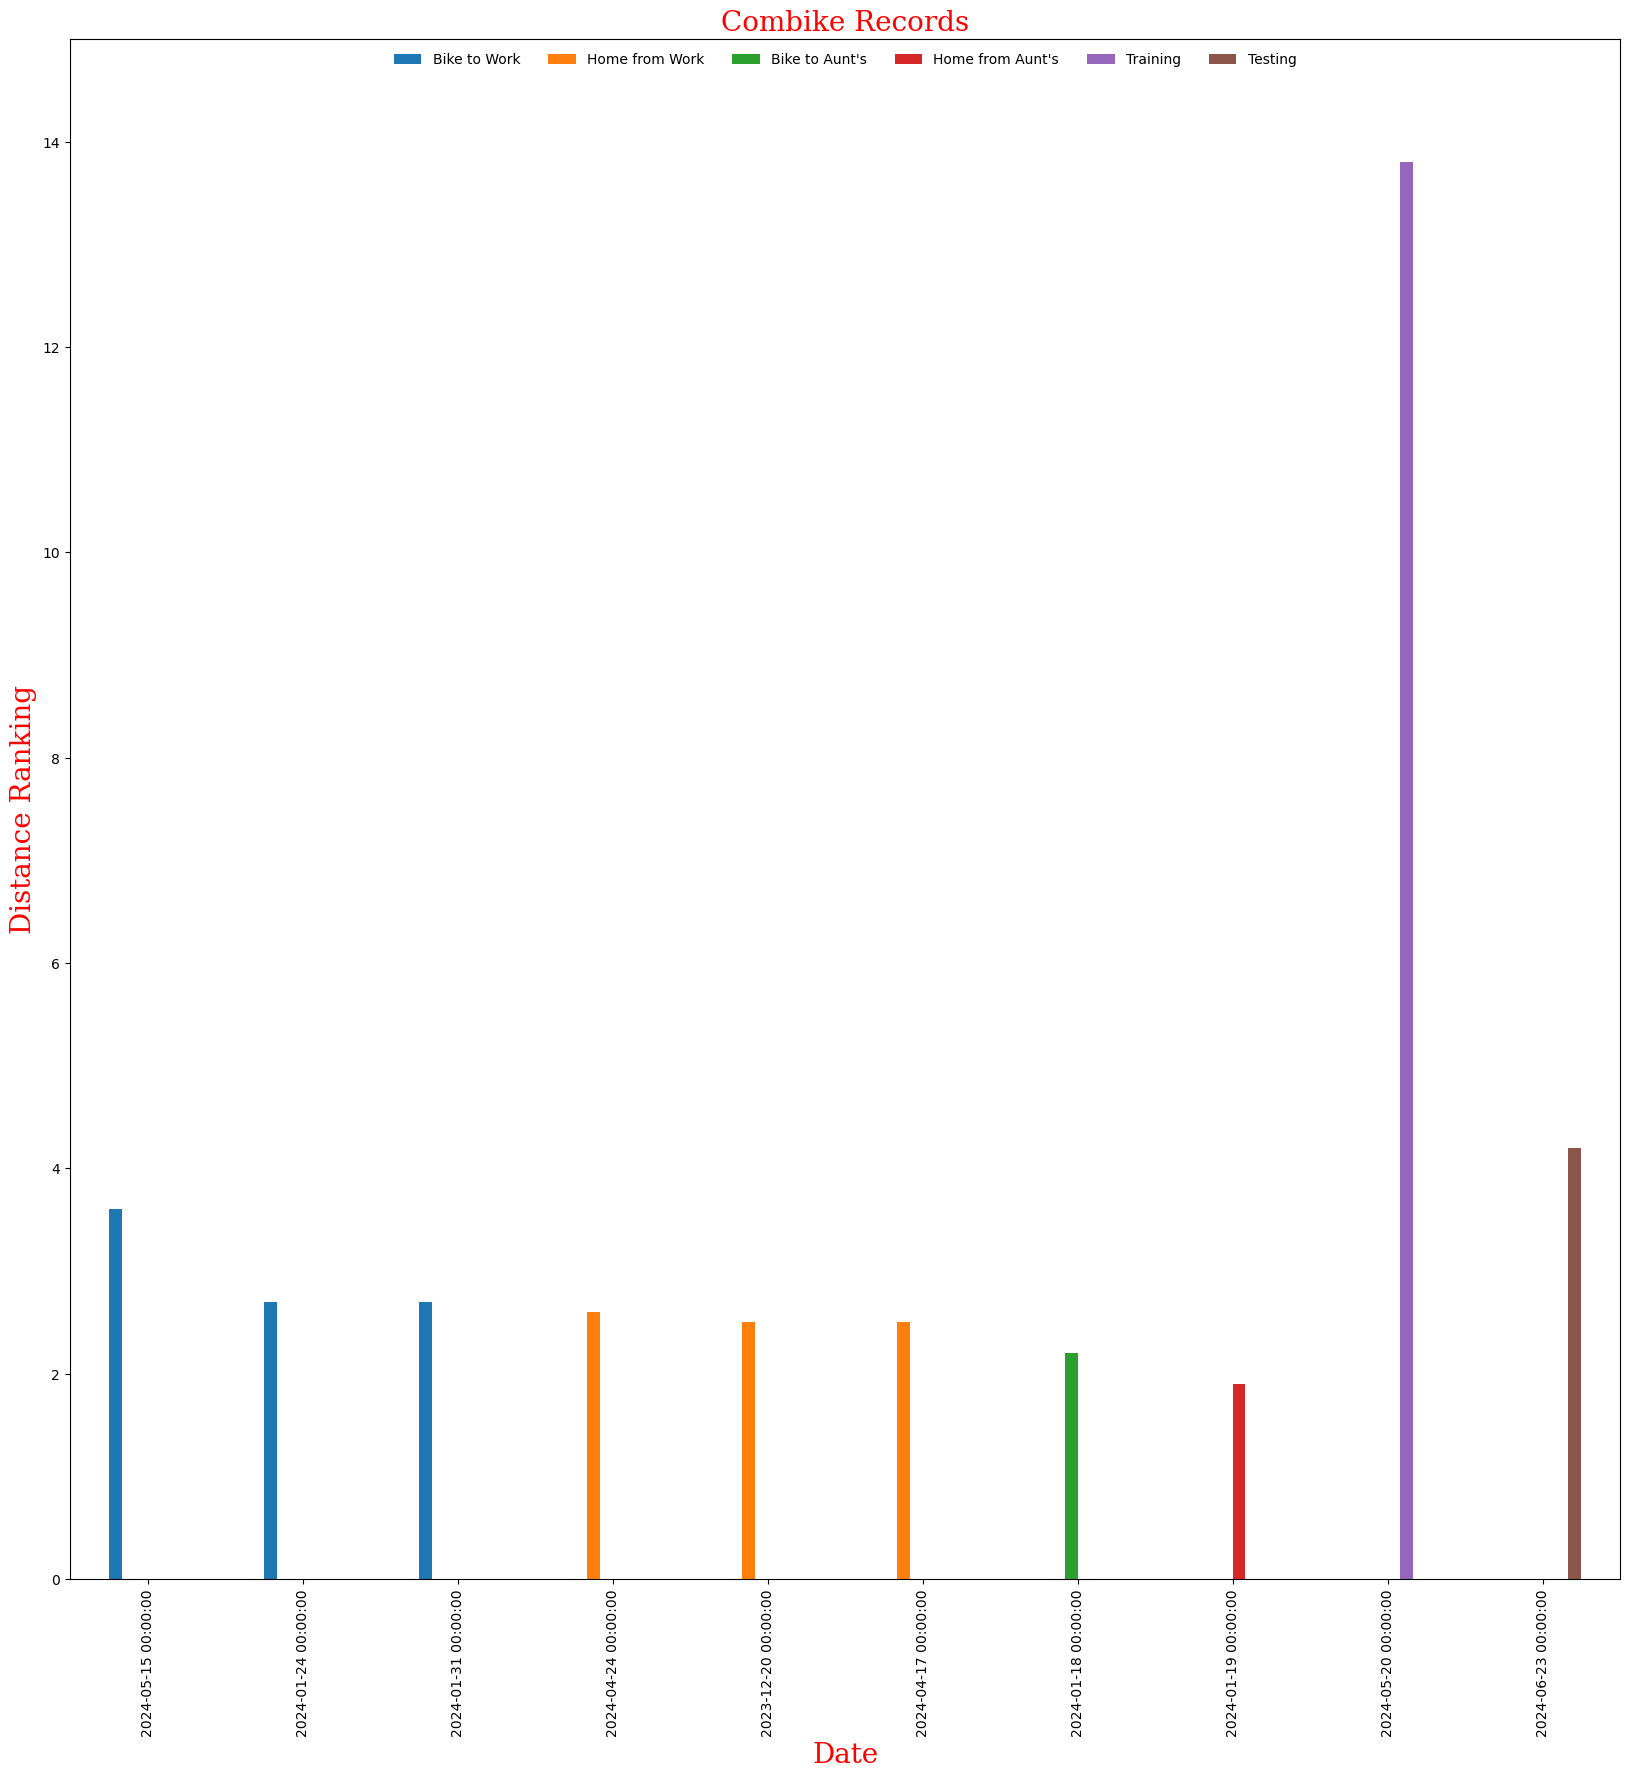

In [28]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
dtr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Bike to Aunt's", "Home from Aunt's", "Training", "Testing"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Combike Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Distance Ranking', fontdict=f1)
plt.ylim(0, 15)
plt.savefig("fig/dtr_combike.png")
plt.show()

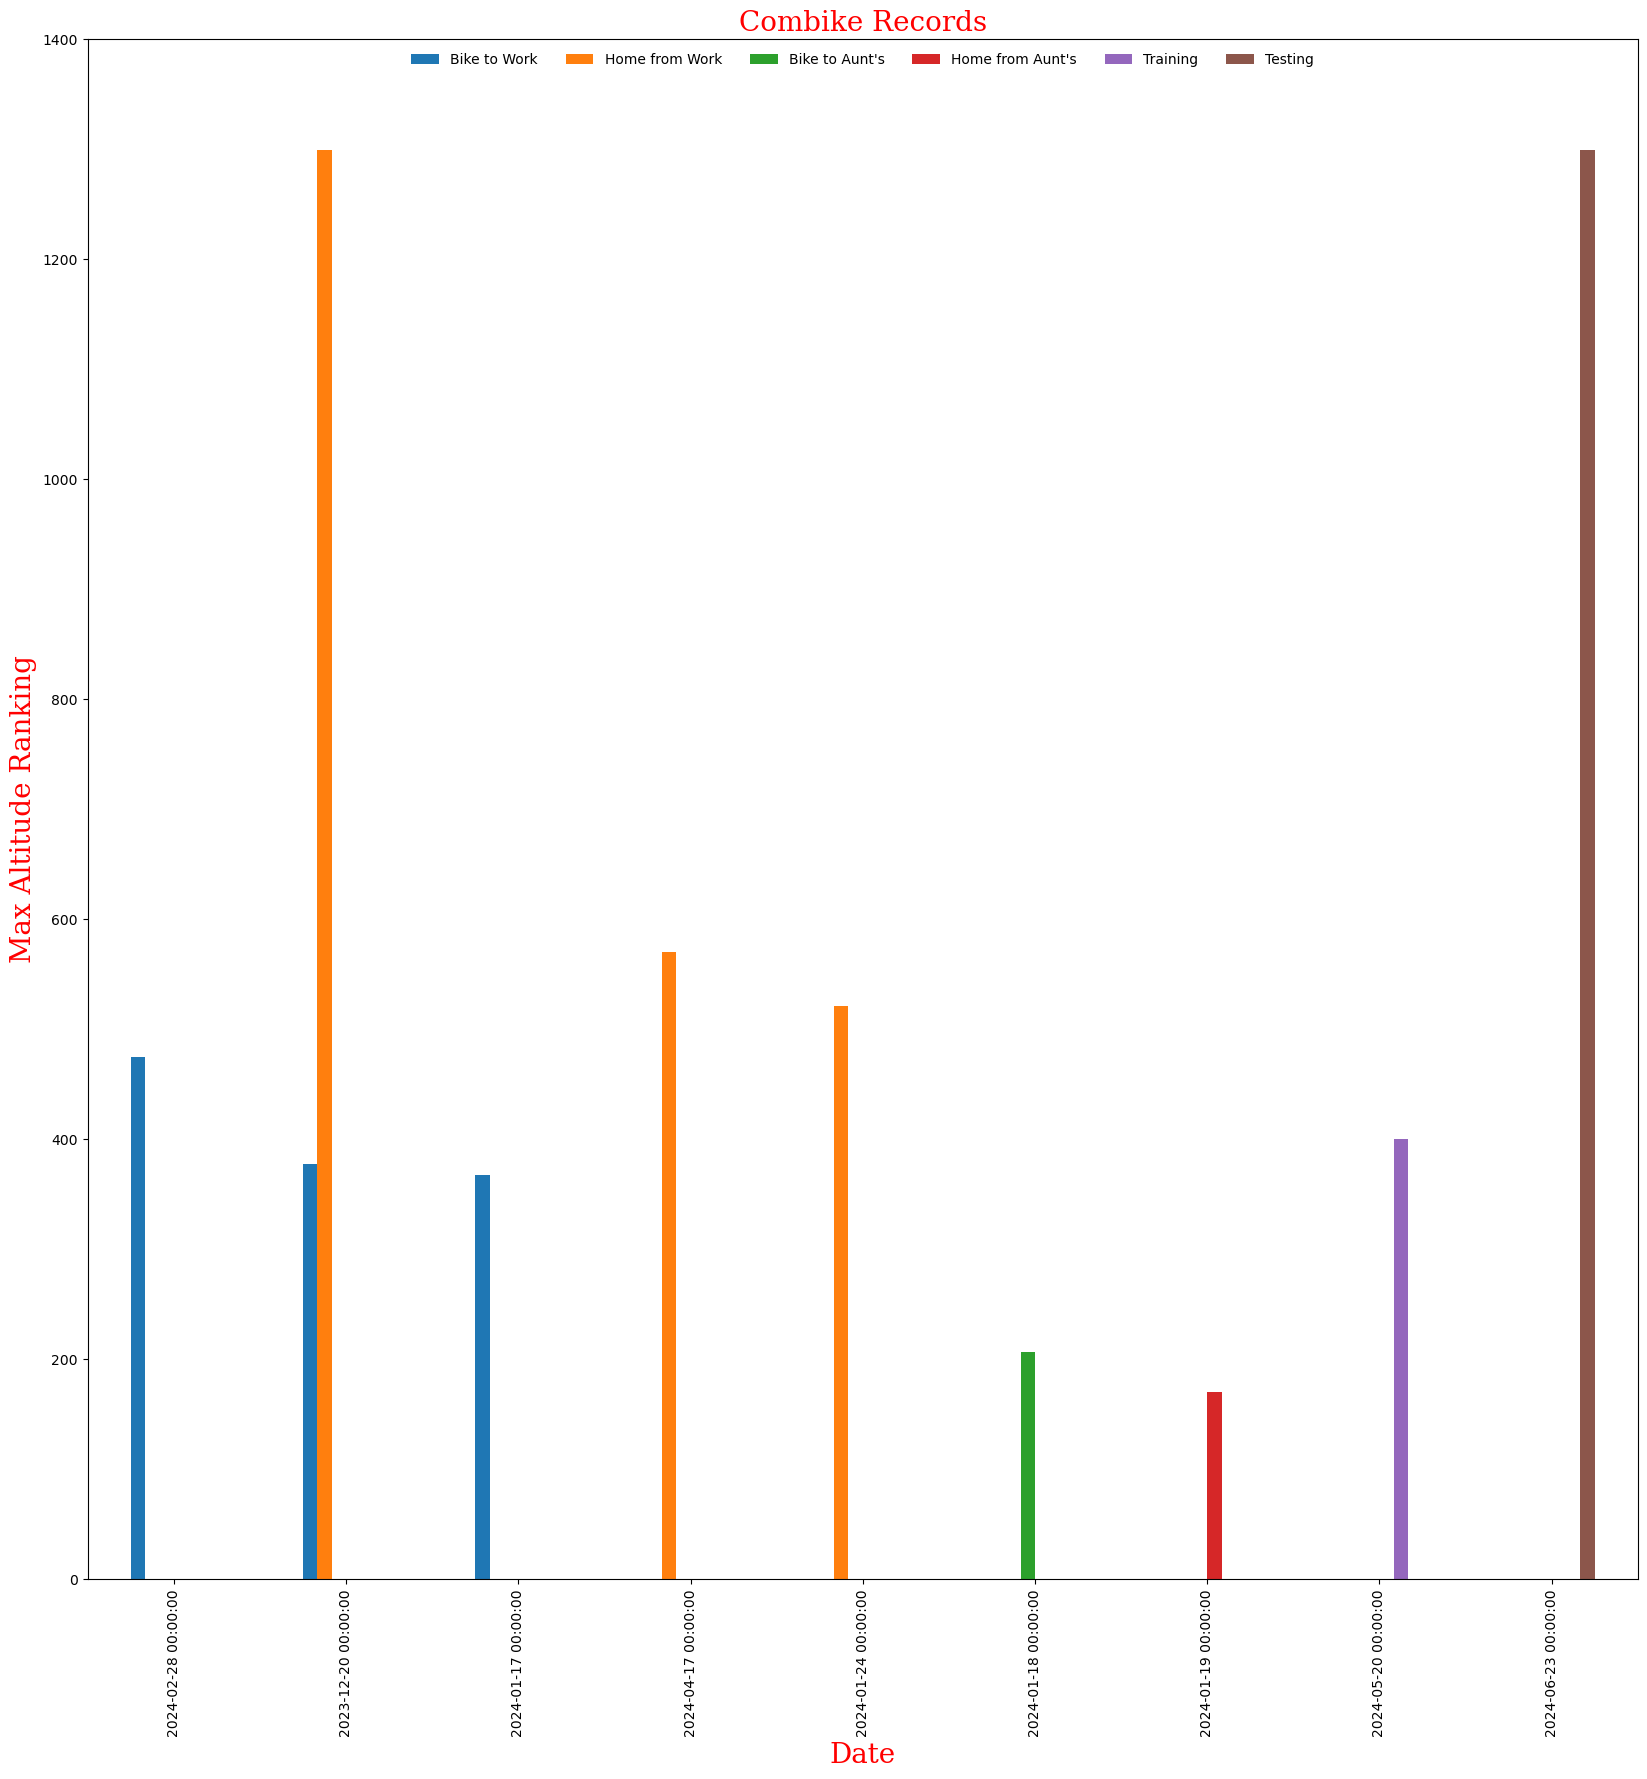

In [29]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
matr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Bike to Aunt's", "Home from Aunt's", "Training", "Testing"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Combike Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Max Altitude Ranking', fontdict=f1)
plt.ylim(0, 1400)
plt.savefig("fig/matr_combike.png")
plt.show()

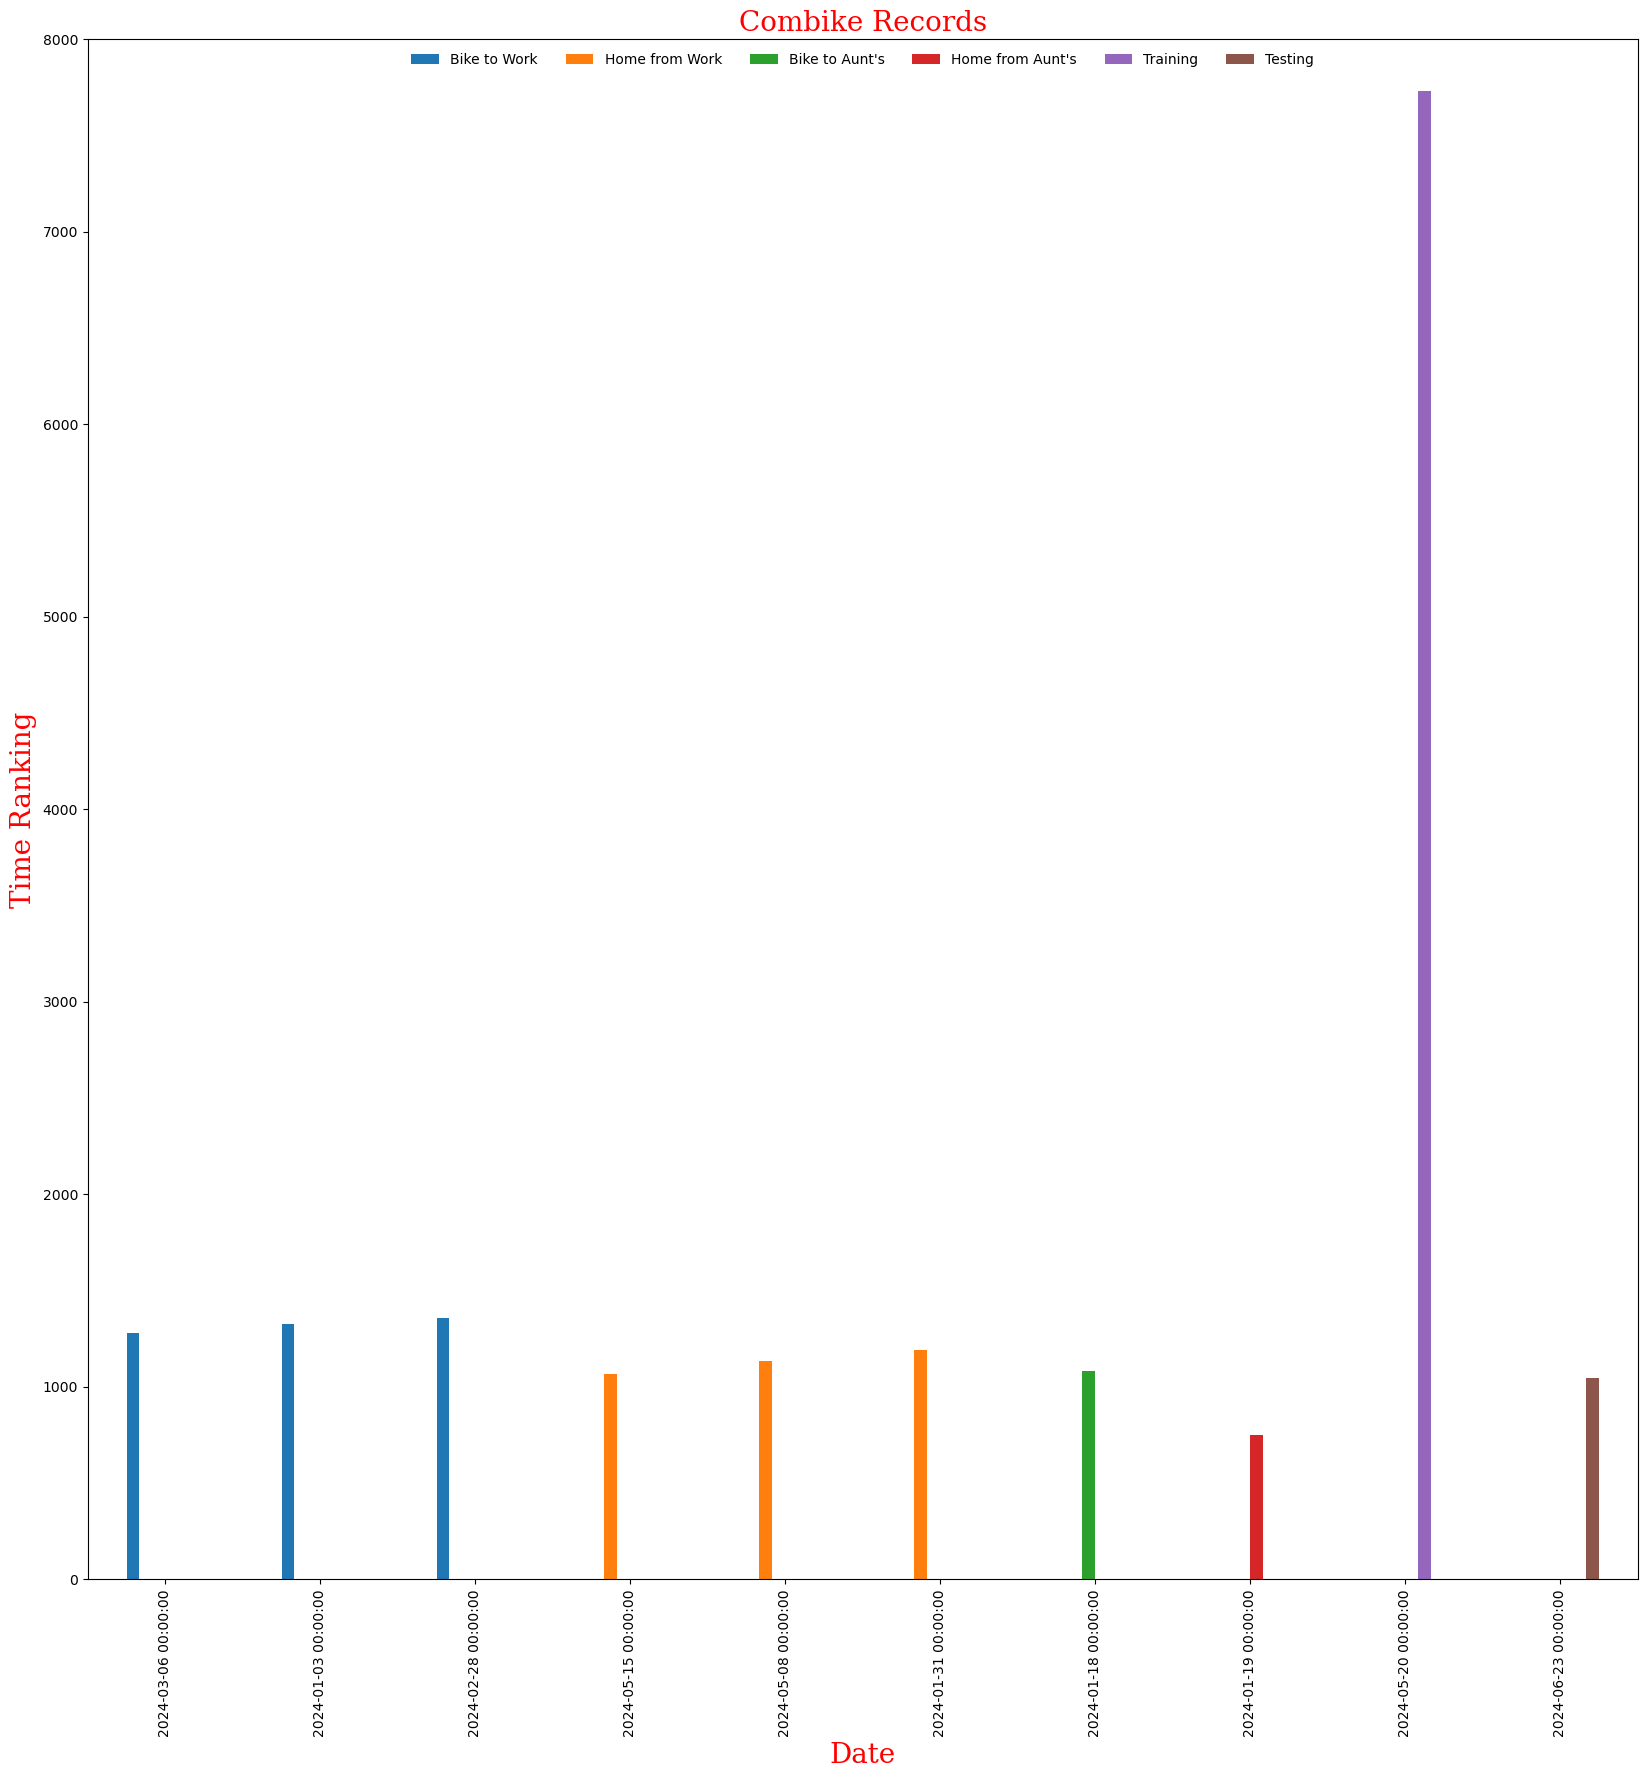

In [30]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
ttr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Bike to Aunt's", "Home from Aunt's", "Training", "Testing"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Combike Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Time Ranking', fontdict=f1)
plt.ylim(0, 8000)
plt.savefig("fig/ttr_combike.png")
plt.show()

In [31]:
# Creating an HTML file 
Func = open("index.html","w") 
   
# Adding input data to the HTML file 
Func.write("<html>\n    <head>\n     <title>\n  Combike Records</title>\n     </head>\n    <table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n       <h2 style='text-align:center;'>\n  Combike Report Summary</h2>\n     <thead>\n         <th colspan='18' style='text-align: center; padding:15px; font-size: 20px; background-color:#FFFF00'>General Information</th>\n        </thead>\n     <table border='3' align='center'class='dataframe' style='text-align:left; width:1000px;'>\n    <thead>\n      <tr style='text-align: center;'>\n        <th colspan='3'>Total Records</th>\n        <th colspan='3'>Files Loaded</th>\n        <th colspan='3'>Category</th>\n        <th colspan='3'>Unit</th>\n        <th colspan='3'>Purpose</th>\n        <th colspan='3'>Count</th>\n      </tr>\n    </thead>\n    <tbody>\n      <tr>\n        <th colspan='3' rowspan='6' style='text-align: center; font-size: 100px; color:#ffff00; background-color: #454541'>38</th>\n        <th colspan='3' rowspan='6' style='text-align: center; font-size: 100px; color:#ffff00; background-color: #454541'>21</th>\n        <th colspan='3'>Average Speed [AS]</th>\n        <td colspan='3'>mph</td>\n        <th colspan='3'>Bike to Aunt's [BtA]</th>\n        <td colspan='3'>1</td>\n      </tr>\n      <tr>\n        <th colspan='3'>Calories Burned [CB]</th>\n        <td colspan='3'>kcal</td>\n        <th colspan='3'>Bike to Work [BtW]</th>\n        <td colspan='3'>17</td>\n      </tr>\n      <tr>\n        <th colspan='3'>Distance [Di]</th>\n        <td colspan='3'>mi</td>\n        <th colspan='3'>Home from Aunt's [HfA]</th>\n        <td colspan='3'>1</td>\n      </tr>\n      <tr>\n        <th colspan='3'>Max Altitude [MA]</th>\n        <td colspan='3'>ft</td>\n        <th colspan='3'>Home from Work [HfW]</th>\n        <td colspan='3'>17</td>\n      </tr>\n      <tr>\n        <th colspan='3' rowspan='2'>Time [Ti]</th>\n        <td colspan='3' rowspan='2'>sec</td>\n        <th colspan='3'>Testing [Te]</th>\n        <td colspan='3'>1</td>\n      </tr>\n      <tr>\n        <th colspan='3'>Training [Tr]</th>\n        <td colspan='3'>1</td>\n      </tr>\n    </tbody>\n</table>\n  <table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n     <thead>\n       <th colspan='18' style='text-align: center; padding:15px; font-size: 20px; background-color:#FFFF00'>Statistics</th>\n      </thead>\n    <table border='3' align='center'class='dataframe' style='text-align:left; width:1000px;'>\n    <thead>\n          <tr style='text-align: center;'>\n            <th rowspan='2'>Category</th>\n             <th colspan='6' style='text-align:center'>Min</th>\n              <th colspan='6' style='text-align:center'>Max</th>\n             <th rowspan='2'>Category</th>\n             <th rowspan='2'>Sum</th>\n          </tr>\n      <tr>\n                 <th>BtW</th>\n              <th>HfW</th>\n              <th>BfA</th>\n              <th>HfA</th>\n              <th>Te</th>\n              <th>Tr</th>\n              <th>BtW</th>\n              <th>HfW</th>\n              <th>BfA</th>\n              <th>HfA</th>\n              <th>Te</th>\n              <th>Tr</th>\n          </tr>\n       </thead>\n      <tbody>\n          <tr>\n              <th>AS</th>\n              <td style='font-size: 20px; color:#d12d2d'>6.6</td>\n              <td style='font-size: 20px; color:#d12d2d'>7.7</td>\n              <td style='font-size: 20px; color:#d12d2d'>8.5</td>\n              <td style='font-size: 20px; color:#d12d2d'>9.9</td>\n              <td style='font-size: 20px; color:#d12d2d'>8.4</td>\n              <td style='font-size: 20px; color:#d12d2d'>9.0</td>\n              <td style='font-size: 20px; color:#68d12d'>9.4</td>\n              <td style='font-size: 20px; color:#68d12d'>10.4</td>\n              <td style='font-size: 20px; color:#68d12d'>8.5</td>\n              <td style='font-size: 20px; color:#68d12d'>9.9</td>\n              <td style='font-size: 20px; color:#68d12d'>8.4</td>\n              <td style='font-size: 20px; color:#68d12d'>9.0</td>\n            <th rowspan='2'>CB</th>\n           <td rowspan='2' style='font-size: 20px; color:#357dc6'>7879.0</td>\n          </tr>\n          <tr>\n              <th>CB</th>\n              <td style='font-size: 20px; color:#d12d2d'>50.0</td>\n              <td style='font-size: 20px; color:#d12d2d'>72.0</td>\n              <td style='font-size: 20px; color:#d12d2d'>54.0</td>\n              <td style='font-size: 20px; color:#d12d2d'>25.0</td>\n              <td style='font-size: 20px; color:#d12d2d'>59.0</td>\n              <td style='font-size: 20px; color:#d12d2d'>701.0</td>\n              <td style='font-size: 20px; color:#68d12d'>226.0</td>\n              <td style='font-size: 20px; color:#68d12d'>1887.0</td>\n              <td style='font-size: 20px; color:#68d12d'>54.0</td>\n              <td style='font-size: 20px; color:#68d12d'>25.0</td>\n              <td style='font-size: 20px; color:#68d12d'>59.0</td>\n              <td style='font-size: 20px; color:#68d12d'>701.0</td>\n          </tr>\n          <tr>\n              <th>Di</th>\n              <td style='font-size: 20px; color:#d12d2d'>2.5</td>\n              <td style='font-size: 20px; color:#d12d2d'>2.0</td>\n              <td style='font-size: 20px; color:#d12d2d'>2.2</td>\n              <td style='font-size: 20px; color:#d12d2d'>1.9</td>\n              <td style='font-size: 20px; color:#d12d2d'>4.2</td>\n              <td style='font-size: 20px; color:#d12d2d'>13.8</td>\n              <td style='font-size: 20px; color:#68d12d'>3.6</td>\n              <td style='font-size: 20px; color:#68d12d'>2.6</td>\n              <td style='font-size: 20px; color:#68d12d'>2.2</td>\n              <td style='font-size: 20px; color:#68d12d'>1.9</td>\n              <td style='font-size: 20px; color:#68d12d'>4.2</td>\n              <td style='font-size: 20px; color:#68d12d'>13.8</td>\n            <th>Di</th>\n           <td style='font-size: 20px; color:357dc6'>108.7</td>\n            </tr>\n          <tr>\n              <th>MA</th>\n              <td style='font-size: 20px; color:#d12d2d'>278.0</td>\n             <td style='font-size: 20px; color:#d12d2d'>295.0</td>\n      <td style='font-size: 20px; color:#d12d2d'>206.0</td>\n              <td style='font-size: 20px; color:#d12d2d'>170.0</td>\n          <td style='font-size: 20px; color:#d12d2d'>1299.0</td>\n              <td style='font-size: 20px; color:#d12d2d'>400.0</td>\n              <td style='font-size: 20px; color:#68d12d'>475.0</td>\n              <td style='font-size: 20px; color:#68d12d'>1299.0</td>\n              <td style='font-size: 20px; color:#68d12d'>206.0</td>\n              <td style='font-size: 20px; color:#68d12d'>170.0</td>\n              <td style='font-size: 20px; color:#68d12d'>1299.0</td>\n              <td style='font-size: 20px; color:#68d12d'>400.0</td>\n            <th rowspan='2'>Ti</th>\n           <td rowspan='2' style='font-size: 20px; color:357dc6'>62419.0</td>\n              </tr>\n          <tr>\n              <th>Ti</th>\n              <td style='font-size: 20px; color:#d12d2d'>1278.0</td>\n              <td style='font-size: 20px; color:#d12d2d'>1067.0</td>\n              <td style='font-size: 20px; color:#d12d2d'>1081.0</td>\n              <td style='font-size: 20px; color:#d12d2d'>751.0</td>\n              <td style='font-size: 20px; color:#d12d2d'>1047.0</td>\n              <td style='font-size: 20px; color:#d12d2d'>7729.0</td>\n              <td style='font-size: 20px; color:#68d12d'>2429.0</td>\n              <td style='font-size: 20px; color:#68d12d'>1861.0</td>\n              <td style='font-size: 20px; color:#68d12d'>1081.0</td>\n              <td style='font-size: 20px; color:#68d12d'>751.0</td>\n              <td style='font-size: 20px; color:#68d12d'>1047.0</td>\n              <td style='font-size: 20px; color:#68d12d'>7729.0</td>\n          </tr>\n      </tbody>\n</table>  <table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n      <thead>\n            <tr>\n                  <th colspan='6' style='text-align: center'>Ave</th>\n            </tr>\n            <tr>\n               <th rowspan='2'>Purpose</th>\n                  <th rowspan='2'>Di</th>\n                   <th>AS</th>\n                  <th>CB</th>\n                  <th>MA</th>\n                  <th>Ti</th>\n            </tr>\n        </thead>\n      <tbody>\n            <tr>\n                  <th>BtA</th>\n                  <th>2.2</th>\n                  <td>8.50</td>\n                  <td>54.00</td>\n                  <td>206.00</td>\n                  <td>1081.00</td>\n            </tr>\n            <tr>\n                  <th rowspan='4' valign='top'>BtW</th>\n                  <th>2.5</th>\n                  <td>7.91</td>\n                  <td>81.71</td>\n                  <td>347.57</td>\n                  <td>1401.00</td>\n            </tr>\n            <tr>\n                  <th>2.6</th>\n                  <td>7.32</td>\n                  <td>146.40</td>\n                  <td>320.20</td>\n                  <td>1889.00</td>\n            </tr>\n            <tr>\n                  <th>2.7</th>\n                  <td>8.07</td>\n                  <td>102.25</td>\n                  <td>316.25</td>\n                  <td>1741.50</td>\n            </tr>\n            <tr>\n                  <th>3.6</th>\n                  <td>9.40</td>\n                  <td>108.00</td>\n                  <td>288.00</td>\n                  <td>1662.00</td>\n            </tr>\n            <tr>\n                  <th>HfA</th>\n                  <th>1.9</th>\n                  <td>9.90</td>\n                  <td>25.00</td>\n                  <td>170.00</td>\n                  <td>751.00</td>\n            </tr>\n            <tr>\n                  <th rowspan='5' valign='top'>HfW</th>\n                  <th>2.0</th>\n                  <td>8.70</td>\n                  <td>92.00</td>\n                  <td>475.00</td>\n                  <td>1283.00</td>\n            </tr>\n            <tr>\n                  <th>2.2</th>\n                  <td>9.50</td>\n                  <td>91.00</td>\n                  <td>354.00</td>\n                  <td>1190.00</td>\n            </tr>\n            <tr>\n                  <th>2.4</th>\n                  <td>8.20</td>\n                  <td>92.00</td>\n                  <td>347.00</td>\n                  <td>1437.00</td>\n            </tr>\n            <tr>\n                  <th>2.5</th>\n                  <td>8.65</td>\n                  <td>372.15</td>\n                  <td>528.46</td>\n                  <td>1432.15</td>\n            </tr>\n            <tr>\n                  <th>2.6</th>\n                  <td>8.10</td>\n                  <td>106.00</td>\n                  <td>295.00</td>\n                  <td>1403.00</td>\n            </tr>\n            <tr>\n                  <th>Te</th>\n                  <th>4.2</th>\n                  <td>8.40</td>\n                  <td>59.00</td>\n                  <td>1299.00</td>\n                  <td>1047.00</td>\n            </tr>\n            <tr>\n                  <th>Tr</th>\n                  <th>13.8</th>\n                  <td>9.00</td>\n                  <td>701.00</td>\n                  <td>400.00</td>\n                  <td>7729.00</td>\n            </tr>\n      </tbody>\n  </table>  <table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n       <thead>\n         <th colspan='18' style='text-align: center; padding:15px; font-size: 20px; background-color:#FFFF00'>Graph Chart</th>\n        </thead>\n    <table border='3' align='center'class='dataframe' style='text-align:left; width:1000px;'>\n    <thead>\n      <tr style='text-align: center;'>\n        <th colspan='3'><a href='fig/ast_combike.png' target='_blank'>AS</a></th>\n        <th colspan='3'><a href='fig/cbt_combike.png' target='_blank'>CB</a></th>\n        <th colspan='3'><a href='fig/dt_combike.png' target='_blank'>Di</a></th>\n        <th colspan='3'><a href='fig/mat_combike.png' target='_blank'>MA</a></th>\n        <th colspan='3'><a href='fig/tt_combike.png' target='_blank'>Ti</a></th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th colspan='3'><a href='fig/astr_combike.png' target='_blank'>ASR</a></th>\n        <th colspan='3'><a href='fig/cbtr_combike.png' target='_blank'>CBR</a></th>\n        <th colspan='3'><a href='fig/dtr_combike.png' target='_blank'>DiR</a></th>\n        <th colspan='3'><a href='fig/matr_combike.png' target='_blank'>MAR</a></th>\n        <th colspan='3'><a href='fig/ttr_combike.png' target='_blank'>TiR</a></th>\n      </tr>\n    </thead>\n  <table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n       <thead>\n         <th colspan='18' style='text-align: center; padding:15px; font-size: 20px; background-color:#FFFF00'>Rankings</th>\n        </thead>\n   <table border='3' align='center'class='dataframe' style='text-align:left; width:1000px;'>\n    <thead>\n      <tr style='text-align: center;'>\n        <th rowspan='2'>Rank</th>\n        <th colspan='5' style='background-color:#ffff00'>BtW</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>AS</th>\n        <th>CB</th>\n        <th>Di</th>\n        <th>MA</th>\n        <th>Ti</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th style='font-size:20px; color:#ffff00; background-color: #454541'>1</th>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-05-15 (9.4)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-04-24 (226.0)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-05-15 (3.6)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-02-28 (475.0)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-03-06 (1278.0)</td>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>2</th>\n        <td>2023-12-20 (8.8)</td>\n        <td>2024-02-07 (152.0)</td>\n        <td>2024-01-24 (2.7)</td>\n        <td>2023-12-20 (377.0)</td>\n        <td>2024-01-03 (1327.0)</td>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>3</th>\n        <td>2024-01-31 (8.6)</td>\n    <td>2024-01-17 (127.0)</td>\n        <td>2024-01-31 (2.7)</td>\n        <td>2024-01-17 (367.0)</td>\n        <td>2024-02-28 (1357.0)</td>\n      </tr>\n            <tr style='text-align: center;'>\n        <th rowspan='2'>Rank</th>\n        <th colspan='5' style='background-color:#ffff00'>HfW</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>AS</th>\n        <th>CB</th>\n        <th>Di</th>\n        <th>MA</th>\n        <th>Ti</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th style='font-size:20px; color:#ffff00; background-color: #454541'>1</th>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-05-15 (10.4)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-05-08 (1887.0)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-04-24 (2.6)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2023-12-20 (1299.0)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-05-15 (1067.0)</td>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>2</th>\n        <td>2023-12-20 (9.7)</td>\n        <td>2023-12-20 (1787.0)</td>\n        <td>2023-12-20 (2.5)</td>\n        <td>2024-04-17 (570.0)</td>\n        <td>2024-05-08 (1133.0)</td>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>3</th>\n        <td>2024-01-31 (9.5)</td>\n        <td>2024-01-24 (146.0)</td>\n        <td>2024-04-17 (2.5)</td>\n        <td>2024-01-24 (521.0)</td>\n        <td>2024-01-31 (1190.0)</td>\n      </tr>\n            <tr style='text-align: center;'>\n        <th rowspan='2'>Rank</th>\n        <th colspan='5' style='background-color:#ffff00'>BtA</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>AS</th>\n        <th>CB</th>\n        <th>Di</th>\n        <th>MA</th>\n        <th>Ti</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th style='font-size:20px; color:#ffff00; background-color: #454541'>1</th>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-01-18 (8.5)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-01-18 (54.0)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-01-18 (2.2)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-01-18 (206.0)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-01-18 (1081.0)</td>\n      </tr>\n      <tr style='text-align: center;'>\n        <th rowspan='2'>Rank</th>\n        <th colspan='5' style='background-color:#ffff00'>HfA</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>AS</th>\n        <th>CB</th>\n        <th>Di</th>\n        <th>MA</th>\n        <th>Ti</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th style='font-size:20px; color:#ffff00; background-color: #454541'>1</th>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-01-19 (9.9)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-01-19 (25.0)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-01-19 (1.9)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-01-19 (170.0)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-01-19 (751.0)</td>\n      </tr>\n      <tr style='text-align: center;'>\n        <th rowspan='2'>Rank</th>\n        <th colspan='5' style='background-color:#ffff00'>Te</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>AS</th>\n        <th>CB</th>\n        <th>Di</th>\n        <th>MA</th>\n        <th>Ti</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th style='font-size:20px; color:#ffff00; background-color: #454541'>1</th>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-06-23 (8.4)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-06-23 (59.0)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-06-23 (4.2)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-06-23 (1299.0)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-06-23 (1047.0)</td>\n      </tr>\n      <tr style='text-align: center;'>\n        <th rowspan='2'>Rank</th>\n        <th colspan='5' style='background-color:#ffff00'>Tr</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>AS</th>\n        <th>CB</th>\n        <th>Di</th>\n        <th>MA</th>\n        <th>Ti</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th style='font-size:20px; color:#ffff00; background-color: #454541'>1</th>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-05-20 (9.0)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-05-20 (701.0)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-05-20 (13.8)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-05-20 (400.0)</td>\n        <td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-05-20 (7729.0)</td>\n      </tr>\n    </thead>\n</table>\n</table>\n</html>\n")
              
# Saving the data into the HTML file 
Func.close()